# 예측 모델
 > ## 1. MLP(hidden layer 1개, tensorflow)
 ## 2. MLP(hidden layer 2개, tensorflow)
 ## 3. MLP, DNN(keras)
 ## 4. Randomforest
 ## 5. XGBoost
 ## 6. LightGBM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/airi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 처리해놓은 데이터 로딩
train_file = "./data/train_2.csv"
test_file = "./data/test_2.csv"

x_train = pd.read_csv(train_file, engine='python')
x_test = pd.read_csv(test_file, engine='python')

In [3]:
y_train = x_train.SalePrice
x_train.drop(['SalePrice'], axis=1, inplace=True)

In [4]:
display(x_train.head())
display(x_test.head())

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,YearBuilt_1980's,YearBuilt_1990's,YearBuilt_2000's,YearRemodAdd_1940's,YearRemodAdd_1950's,YearRemodAdd_1960's,YearRemodAdd_1970's,YearRemodAdd_1980's,YearRemodAdd_1990's,YearRemodAdd_2000's
0,-0.784689,1.214179,-0.112313,0.251255,1.129973,-0.251374,-0.547956,-0.423910,-0.979803,0.810093,...,0,0,1,0,0,0,0,0,0,1
1,0.403194,-0.859795,-0.112313,0.251255,-0.833091,3.880135,-0.132294,-0.423910,0.751112,0.810093,...,0,0,0,0,0,0,1,0,0,0
2,-0.569273,1.220996,-0.112313,0.251255,1.129973,-0.251374,0.167200,-0.423910,0.751112,0.810093,...,0,0,1,0,0,0,0,0,0,1
3,-0.437869,1.155241,-0.112313,0.251255,1.129973,-0.251374,0.329240,2.903308,0.751112,-1.027091,...,0,0,0,0,0,1,0,0,0,0
4,0.098904,1.318031,-0.112313,1.273273,1.129973,-0.251374,0.256527,-0.423910,0.751112,0.810093,...,0,1,0,0,0,0,0,0,1,0


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,YearBuilt_1980's,YearBuilt_1990's,YearBuilt_2000's,YearRemodAdd_1940's,YearRemodAdd_1950's,YearRemodAdd_1960's,YearRemodAdd_1970's,YearRemodAdd_1980's,YearRemodAdd_1990's,YearRemodAdd_2000's
0,-0.648517,-0.859795,-0.112313,-1.016868,-0.833091,-0.251374,-0.166720,-0.42391,-0.979803,-1.027091,...,0,0,0,0,0,1,0,0,0,0
1,0.566804,-0.859795,-0.112313,0.251255,-0.833091,-0.251374,0.118809,-0.42391,-0.979803,-1.027091,...,0,0,0,0,1,0,0,0,0,0
2,-0.543248,1.119259,-0.112313,0.251255,-0.833091,-0.251374,-0.603727,-0.42391,0.751112,0.810093,...,0,1,0,0,0,0,0,0,1,0
3,-0.549736,1.103498,-0.112313,0.251255,-0.833091,-0.251374,-0.041299,-0.42391,0.751112,0.810093,...,0,1,0,0,0,0,0,0,1,0
4,0.447860,-0.859795,-0.112313,-1.016868,-0.833091,-0.251374,0.830074,-0.42391,-0.979803,0.810093,...,0,1,0,0,0,0,0,0,1,0


- - -
### log-transformation
 saleprice 정규화를 위한 log-transformation

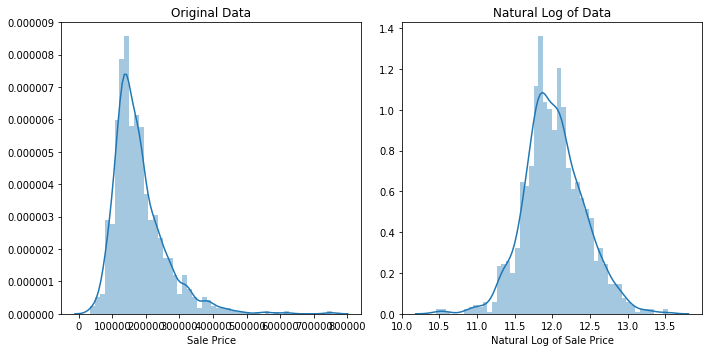

In [5]:
y_train_log = np.log(y_train)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_train, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(y_train_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

### score 도출해주는 함수 선언

In [6]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

지금까지가 데이터 로딩이다. 추후 1번부터 6번까지 모델 정의 및 label 예측이다.<br>
1, 4, 5, 6은 직접적으로 예측에 사용한다. 2, 3은 모델은 정의했지만 생각대로 예측이 정확하게 되지 않아 배제하였다.

- - -
 # 1. MLP(hidden layer 1개, tensorflow)

In [8]:
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split

x_train_np = x_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = x_test.as_matrix()

### hyperparameter init

In [9]:
'''
    num_unit1 : hidden layer의 뉴런 개수
    keepout : keepout rate
    step : 학습 횟수
    learning_rate : optimizer learning rate
'''
num_unit1 = 200
keepout = 0.5
step = 10000
learning_rate = 0.003
batch_size = 30

### 학습 모델(hidden layer 1개)

In [10]:
'''
    y_ : Input labels
    keep_prob : keepout rate
'''
y_ = tf.placeholder(tf.float32, [None,1])
keep_prob = tf.placeholder(tf.float32)

# weight, bias
W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], num_unit1],
                                          stddev=0.1))
b1 = tf.Variable(tf.constant(0., shape = [num_unit1]))

W0 = tf.Variable(tf.truncated_normal([num_unit1, 1],
                                     stddev=0.1))
b0 = tf.Variable(tf.constant(0., shape = [1]))

# Input layer
x1 = tf.placeholder(tf.float32, [None, x_train.shape[1]])

# Hidden1 layer
hidden1 = tf.nn.relu(tf.matmul(x1, W1) + b1)
# hidden1 = (tf.matmul(x1, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)

# Output layer(Labels_predict)
k = tf.matmul(hidden1_drop, W0) + b0

'''
    cost func : MSE
    optimizer : adam
'''
cost = tf.losses.mean_squared_error(labels = y_, predictions = k)
lr = tf.placeholder(tf.float32)
train_step = tf.train.AdamOptimizer(lr).minimize(cost)

### 학습 / 검증(split data로 train)

In [11]:
x_train1, x_train2, y_train1, y_train2 = train_test_split(x_train_np,
                                                    y_train_log,
                                                    test_size=0.33,
                                                    random_state=7)
# mini batch를 일단 없애고 진행했다.
batch_size = x_train1.shape[0]

print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])
y_train1 = y_train1.reshape([y_train1.shape[0], 1])
y_train2 = y_train2.reshape([y_train2.shape[0], 1])

j=0
for _ in range(step):
    j += 1

    batch_count = int(math.ceil(x_train1.shape[0]/batch_size))
    for i in range(batch_count):
        batch_xs1, batch_ys1 = x_train1[batch_size * i : batch_size*(i+1)], y_train1[batch_size * i : batch_size*(i+1)]
        sess.run(train_step,
                            feed_dict={x1: batch_xs1, y_: batch_ys1, keep_prob:keepout, lr : learning_rate})
        summary = sess.run(merged,
                            feed_dict={x1: x_train2, y_: y_train2, keep_prob:keepout, lr : learning_rate})
        train_writer.add_summary(summary, j)
        if i*batch_size % 300 == 0 :
            print('step : {}, batch : {}'.format(j, i*batch_size), end='\t\t')
            print ('loss :',sess.run(cost, feed_dict={x1: x_train1, y_: y_train1, keep_prob:keepout, lr : learning_rate}), 
                   'valid_loss :', sess.run(cost, feed_dict={x1: x_train2, y_: y_train2, keep_prob:keepout, lr : learning_rate}))
train_writer.close()


Training

step : 1, batch : 0		loss : 131.94351 valid_loss : 133.06213
step : 2, batch : 0		loss : 108.37973 valid_loss : 109.193825
step : 3, batch : 0		loss : 87.66447 valid_loss : 89.24113
step : 4, batch : 0		loss : 68.783455 valid_loss : 70.35418
step : 5, batch : 0		loss : 50.817738 valid_loss : 52.5336
step : 6, batch : 0		loss : 35.031784 valid_loss : 36.898396
step : 7, batch : 0		loss : 22.69806 valid_loss : 23.20491
step : 8, batch : 0		loss : 12.805031 valid_loss : 13.134795
step : 9, batch : 0		loss : 5.222345 valid_loss : 5.927925
step : 10, batch : 0		loss : 2.9689894 valid_loss : 3.077664
step : 11, batch : 0		loss : 4.3325806 valid_loss : 3.8190649
step : 12, batch : 0		loss : 7.9572663 valid_loss : 7.721493
step : 13, batch : 0		loss : 13.338987 valid_loss : 13.204267
step : 14, batch : 0		loss : 16.443789 valid_loss : 15.760273
step : 15, batch : 0		loss : 17.623978 valid_loss : 16.174238
step : 16, batch : 0		loss : 15.9269905 valid_loss : 16.325695
step : 17, batch

step : 150, batch : 0		loss : 1.9890336 valid_loss : 1.6979573
step : 151, batch : 0		loss : 2.0963163 valid_loss : 2.0671096
step : 152, batch : 0		loss : 2.093295 valid_loss : 1.8930818
step : 153, batch : 0		loss : 1.9619249 valid_loss : 2.0153754
step : 154, batch : 0		loss : 1.8684605 valid_loss : 2.0422583
step : 155, batch : 0		loss : 1.9439276 valid_loss : 2.036483
step : 156, batch : 0		loss : 2.0147374 valid_loss : 1.9981407
step : 157, batch : 0		loss : 1.7540147 valid_loss : 1.8222063
step : 158, batch : 0		loss : 1.9003766 valid_loss : 1.8351179
step : 159, batch : 0		loss : 1.9632689 valid_loss : 1.8633727
step : 160, batch : 0		loss : 1.9463927 valid_loss : 1.839757
step : 161, batch : 0		loss : 1.9122919 valid_loss : 2.0728896
step : 162, batch : 0		loss : 1.8535748 valid_loss : 1.8899316
step : 163, batch : 0		loss : 1.9561735 valid_loss : 1.9935478
step : 164, batch : 0		loss : 1.7581328 valid_loss : 2.0304477
step : 165, batch : 0		loss : 1.7882286 valid_loss : 1.831

step : 297, batch : 0		loss : 1.555074 valid_loss : 1.6911561
step : 298, batch : 0		loss : 1.422922 valid_loss : 1.4480197
step : 299, batch : 0		loss : 1.5254934 valid_loss : 1.4946213
step : 300, batch : 0		loss : 1.742779 valid_loss : 1.7193745
step : 301, batch : 0		loss : 1.5406368 valid_loss : 1.8098123
step : 302, batch : 0		loss : 1.5672783 valid_loss : 1.4736341
step : 303, batch : 0		loss : 1.353936 valid_loss : 1.4448758
step : 304, batch : 0		loss : 1.6033477 valid_loss : 1.8059359
step : 305, batch : 0		loss : 1.558276 valid_loss : 1.572321
step : 306, batch : 0		loss : 1.4974376 valid_loss : 1.5361269
step : 307, batch : 0		loss : 1.5558884 valid_loss : 1.6411831
step : 308, batch : 0		loss : 1.6785587 valid_loss : 1.3395393
step : 309, batch : 0		loss : 1.4451326 valid_loss : 1.5117563
step : 310, batch : 0		loss : 1.5563143 valid_loss : 1.6267115
step : 311, batch : 0		loss : 1.5001161 valid_loss : 1.5985593
step : 312, batch : 0		loss : 1.4767978 valid_loss : 1.592750

step : 439, batch : 0		loss : 1.4483322 valid_loss : 1.5238621
step : 440, batch : 0		loss : 1.4243011 valid_loss : 1.3628541
step : 441, batch : 0		loss : 1.3989487 valid_loss : 1.4031684
step : 442, batch : 0		loss : 1.383114 valid_loss : 1.3738064
step : 443, batch : 0		loss : 1.4593377 valid_loss : 1.4424363
step : 444, batch : 0		loss : 1.5865911 valid_loss : 1.5470185
step : 445, batch : 0		loss : 1.3909559 valid_loss : 1.486735
step : 446, batch : 0		loss : 1.4877344 valid_loss : 1.507525
step : 447, batch : 0		loss : 1.4165115 valid_loss : 1.4710497
step : 448, batch : 0		loss : 1.4494572 valid_loss : 1.4226394
step : 449, batch : 0		loss : 1.469343 valid_loss : 1.4595056
step : 450, batch : 0		loss : 1.3712784 valid_loss : 1.3713057
step : 451, batch : 0		loss : 1.4117802 valid_loss : 1.4132346
step : 452, batch : 0		loss : 1.3926536 valid_loss : 1.2924057
step : 453, batch : 0		loss : 1.4384272 valid_loss : 1.350905
step : 454, batch : 0		loss : 1.451475 valid_loss : 1.464353

step : 586, batch : 0		loss : 1.3848209 valid_loss : 1.3930602
step : 587, batch : 0		loss : 1.3932985 valid_loss : 1.4078496
step : 588, batch : 0		loss : 1.2770964 valid_loss : 1.4852319
step : 589, batch : 0		loss : 1.3630848 valid_loss : 1.4199696
step : 590, batch : 0		loss : 1.3401058 valid_loss : 1.5189447
step : 591, batch : 0		loss : 1.4172983 valid_loss : 1.498557
step : 592, batch : 0		loss : 1.248936 valid_loss : 1.1738588
step : 593, batch : 0		loss : 1.3424395 valid_loss : 1.2845397
step : 594, batch : 0		loss : 1.3181711 valid_loss : 1.3146908
step : 595, batch : 0		loss : 1.2960687 valid_loss : 1.3981881
step : 596, batch : 0		loss : 1.2803634 valid_loss : 1.4016533
step : 597, batch : 0		loss : 1.3751575 valid_loss : 1.4104959
step : 598, batch : 0		loss : 1.3663396 valid_loss : 1.4025525
step : 599, batch : 0		loss : 1.3441381 valid_loss : 1.3978705
step : 600, batch : 0		loss : 1.2443206 valid_loss : 1.4339294
step : 601, batch : 0		loss : 1.3441408 valid_loss : 1.49

step : 733, batch : 0		loss : 1.3831786 valid_loss : 1.2986983
step : 734, batch : 0		loss : 1.3544335 valid_loss : 1.4558461
step : 735, batch : 0		loss : 1.3344094 valid_loss : 1.4256148
step : 736, batch : 0		loss : 1.3185616 valid_loss : 1.4504371
step : 737, batch : 0		loss : 1.3689013 valid_loss : 1.3437688
step : 738, batch : 0		loss : 1.3576639 valid_loss : 1.3905753
step : 739, batch : 0		loss : 1.324543 valid_loss : 1.4265003
step : 740, batch : 0		loss : 1.3162357 valid_loss : 1.3200581
step : 741, batch : 0		loss : 1.254313 valid_loss : 1.3452542
step : 742, batch : 0		loss : 1.2822148 valid_loss : 1.4310685
step : 743, batch : 0		loss : 1.3167409 valid_loss : 1.3019438
step : 744, batch : 0		loss : 1.3843398 valid_loss : 1.4930099
step : 745, batch : 0		loss : 1.2760583 valid_loss : 1.2205825
step : 746, batch : 0		loss : 1.1690025 valid_loss : 1.3304563
step : 747, batch : 0		loss : 1.333157 valid_loss : 1.3026614
step : 748, batch : 0		loss : 1.3061757 valid_loss : 1.253

step : 878, batch : 0		loss : 1.220133 valid_loss : 1.2690537
step : 879, batch : 0		loss : 1.2985872 valid_loss : 1.2821803
step : 880, batch : 0		loss : 1.2301359 valid_loss : 1.1989247
step : 881, batch : 0		loss : 1.2825994 valid_loss : 1.2474953
step : 882, batch : 0		loss : 1.303882 valid_loss : 1.2161392
step : 883, batch : 0		loss : 1.3912009 valid_loss : 1.3782288
step : 884, batch : 0		loss : 1.2853897 valid_loss : 1.4077569
step : 885, batch : 0		loss : 1.316212 valid_loss : 1.2465338
step : 886, batch : 0		loss : 1.375065 valid_loss : 1.2498041
step : 887, batch : 0		loss : 1.3433483 valid_loss : 1.262023
step : 888, batch : 0		loss : 1.2927116 valid_loss : 1.2691998
step : 889, batch : 0		loss : 1.4006526 valid_loss : 1.4168178
step : 890, batch : 0		loss : 1.3557626 valid_loss : 1.3912615
step : 891, batch : 0		loss : 1.3237234 valid_loss : 1.3142834
step : 892, batch : 0		loss : 1.3283973 valid_loss : 1.2876828
step : 893, batch : 0		loss : 1.1971409 valid_loss : 1.16530

step : 1016, batch : 0		loss : 1.3178004 valid_loss : 1.3715372
step : 1017, batch : 0		loss : 1.1914303 valid_loss : 1.2177817
step : 1018, batch : 0		loss : 1.1938574 valid_loss : 1.2830352
step : 1019, batch : 0		loss : 1.0736321 valid_loss : 1.248483
step : 1020, batch : 0		loss : 1.348058 valid_loss : 1.2029104
step : 1021, batch : 0		loss : 1.2454386 valid_loss : 1.185901
step : 1022, batch : 0		loss : 1.2387515 valid_loss : 1.2696843
step : 1023, batch : 0		loss : 1.3292531 valid_loss : 1.2686204
step : 1024, batch : 0		loss : 1.2908056 valid_loss : 1.1534505
step : 1025, batch : 0		loss : 1.1737406 valid_loss : 1.3025374
step : 1026, batch : 0		loss : 1.3496222 valid_loss : 1.225685
step : 1027, batch : 0		loss : 1.3123232 valid_loss : 1.2583936
step : 1028, batch : 0		loss : 1.1949672 valid_loss : 1.2970726
step : 1029, batch : 0		loss : 1.2254212 valid_loss : 1.3362446
step : 1030, batch : 0		loss : 1.2579533 valid_loss : 1.315026
step : 1031, batch : 0		loss : 1.1809281 vali

step : 1169, batch : 0		loss : 1.1833117 valid_loss : 1.1934164
step : 1170, batch : 0		loss : 1.1550419 valid_loss : 1.2723961
step : 1171, batch : 0		loss : 1.1469934 valid_loss : 1.3691204
step : 1172, batch : 0		loss : 1.2645776 valid_loss : 1.2834935
step : 1173, batch : 0		loss : 1.2250721 valid_loss : 1.2459687
step : 1174, batch : 0		loss : 1.2331707 valid_loss : 1.202746
step : 1175, batch : 0		loss : 1.2454144 valid_loss : 1.2751685
step : 1176, batch : 0		loss : 1.1641254 valid_loss : 1.2044562
step : 1177, batch : 0		loss : 1.2128693 valid_loss : 1.184689
step : 1178, batch : 0		loss : 1.2921258 valid_loss : 1.2086688
step : 1179, batch : 0		loss : 1.3407621 valid_loss : 1.3159566
step : 1180, batch : 0		loss : 1.1376529 valid_loss : 1.1890641
step : 1181, batch : 0		loss : 1.1428475 valid_loss : 1.2560897
step : 1182, batch : 0		loss : 1.2655072 valid_loss : 1.3867618
step : 1183, batch : 0		loss : 1.2061253 valid_loss : 1.1558589
step : 1184, batch : 0		loss : 1.2420868 v

step : 1299, batch : 0		loss : 1.2619963 valid_loss : 1.3313425
step : 1300, batch : 0		loss : 1.1733155 valid_loss : 1.2700212
step : 1301, batch : 0		loss : 1.2490826 valid_loss : 1.3453695
step : 1302, batch : 0		loss : 1.2591541 valid_loss : 1.316987
step : 1303, batch : 0		loss : 1.2288516 valid_loss : 1.2865932
step : 1304, batch : 0		loss : 1.3426162 valid_loss : 1.1673056
step : 1305, batch : 0		loss : 1.2636306 valid_loss : 1.2854352
step : 1306, batch : 0		loss : 1.2127389 valid_loss : 1.3121132
step : 1307, batch : 0		loss : 1.1834303 valid_loss : 1.158768
step : 1308, batch : 0		loss : 1.3535657 valid_loss : 1.1905994
step : 1309, batch : 0		loss : 1.2481664 valid_loss : 1.2482497
step : 1310, batch : 0		loss : 1.2755284 valid_loss : 1.1984595
step : 1311, batch : 0		loss : 1.1254083 valid_loss : 1.1669298
step : 1312, batch : 0		loss : 1.2327123 valid_loss : 1.152762
step : 1313, batch : 0		loss : 1.3335043 valid_loss : 1.3604486
step : 1314, batch : 0		loss : 1.2452823 va

step : 1429, batch : 0		loss : 1.1950881 valid_loss : 1.3306923
step : 1430, batch : 0		loss : 1.2246494 valid_loss : 1.0969236
step : 1431, batch : 0		loss : 1.2856902 valid_loss : 1.1795255
step : 1432, batch : 0		loss : 1.1681627 valid_loss : 1.1998352
step : 1433, batch : 0		loss : 1.0732241 valid_loss : 1.3397025
step : 1434, batch : 0		loss : 1.2701417 valid_loss : 1.2906024
step : 1435, batch : 0		loss : 1.181503 valid_loss : 1.12657
step : 1436, batch : 0		loss : 1.1869116 valid_loss : 1.0886207
step : 1437, batch : 0		loss : 1.3361775 valid_loss : 1.2885023
step : 1438, batch : 0		loss : 1.1720046 valid_loss : 1.172849
step : 1439, batch : 0		loss : 1.2755669 valid_loss : 1.2976971
step : 1440, batch : 0		loss : 1.2005289 valid_loss : 1.2412664
step : 1441, batch : 0		loss : 1.250599 valid_loss : 1.2244942
step : 1442, batch : 0		loss : 1.2425572 valid_loss : 1.0798895
step : 1443, batch : 0		loss : 1.199993 valid_loss : 1.2344869
step : 1444, batch : 0		loss : 1.1976194 valid

step : 1561, batch : 0		loss : 1.1668988 valid_loss : 1.2258993
step : 1562, batch : 0		loss : 1.118267 valid_loss : 1.1903307
step : 1563, batch : 0		loss : 1.0775582 valid_loss : 1.2817813
step : 1564, batch : 0		loss : 1.2618073 valid_loss : 1.1176358
step : 1565, batch : 0		loss : 1.0873104 valid_loss : 1.2973272
step : 1566, batch : 0		loss : 1.1087657 valid_loss : 1.2347142
step : 1567, batch : 0		loss : 1.2411654 valid_loss : 1.2171323
step : 1568, batch : 0		loss : 1.2111349 valid_loss : 1.093026
step : 1569, batch : 0		loss : 1.13984 valid_loss : 1.1263616
step : 1570, batch : 0		loss : 1.2346016 valid_loss : 1.1858153
step : 1571, batch : 0		loss : 1.3349606 valid_loss : 1.3298783
step : 1572, batch : 0		loss : 1.1320785 valid_loss : 1.0660081
step : 1573, batch : 0		loss : 1.1246471 valid_loss : 1.193092
step : 1574, batch : 0		loss : 1.2847874 valid_loss : 1.2963077
step : 1575, batch : 0		loss : 1.1525671 valid_loss : 1.3052883
step : 1576, batch : 0		loss : 1.2082967 vali

step : 1704, batch : 0		loss : 1.101544 valid_loss : 1.2977989
step : 1705, batch : 0		loss : 1.2140323 valid_loss : 1.1843189
step : 1706, batch : 0		loss : 1.1405141 valid_loss : 1.148651
step : 1707, batch : 0		loss : 1.1822239 valid_loss : 1.1613438
step : 1708, batch : 0		loss : 1.1381623 valid_loss : 1.115131
step : 1709, batch : 0		loss : 1.1732863 valid_loss : 1.1594975
step : 1710, batch : 0		loss : 1.1447836 valid_loss : 0.9922107
step : 1711, batch : 0		loss : 1.0685294 valid_loss : 1.1555371
step : 1712, batch : 0		loss : 1.2329679 valid_loss : 1.0679727
step : 1713, batch : 0		loss : 1.2504915 valid_loss : 1.2479333
step : 1714, batch : 0		loss : 1.1235247 valid_loss : 1.18695
step : 1715, batch : 0		loss : 1.2001079 valid_loss : 1.3755933
step : 1716, batch : 0		loss : 1.1395917 valid_loss : 1.2256078
step : 1717, batch : 0		loss : 1.1135179 valid_loss : 1.2620243
step : 1718, batch : 0		loss : 1.2124532 valid_loss : 1.1215914
step : 1719, batch : 0		loss : 1.1942163 vali

step : 1857, batch : 0		loss : 1.0383852 valid_loss : 1.0685792
step : 1858, batch : 0		loss : 1.1159916 valid_loss : 1.212535
step : 1859, batch : 0		loss : 1.2042401 valid_loss : 1.2326744
step : 1860, batch : 0		loss : 1.0600798 valid_loss : 1.1071376
step : 1861, batch : 0		loss : 1.1917906 valid_loss : 1.1646497
step : 1862, batch : 0		loss : 1.1359982 valid_loss : 1.1439451
step : 1863, batch : 0		loss : 0.994444 valid_loss : 1.1007925
step : 1864, batch : 0		loss : 1.0787622 valid_loss : 1.125909
step : 1865, batch : 0		loss : 1.1762187 valid_loss : 1.0863249
step : 1866, batch : 0		loss : 1.2129503 valid_loss : 1.1938233
step : 1867, batch : 0		loss : 1.0922632 valid_loss : 1.1616501
step : 1868, batch : 0		loss : 1.0719179 valid_loss : 1.143524
step : 1869, batch : 0		loss : 1.2055678 valid_loss : 1.2159833
step : 1870, batch : 0		loss : 1.0756581 valid_loss : 1.0687772
step : 1871, batch : 0		loss : 1.1108023 valid_loss : 1.1077511
step : 1872, batch : 0		loss : 1.0148748 val

step : 2003, batch : 0		loss : 1.038879 valid_loss : 1.0279497
step : 2004, batch : 0		loss : 1.0251564 valid_loss : 1.0910798
step : 2005, batch : 0		loss : 1.0647476 valid_loss : 1.0113977
step : 2006, batch : 0		loss : 1.1667823 valid_loss : 1.1691271
step : 2007, batch : 0		loss : 1.0395094 valid_loss : 1.1693099
step : 2008, batch : 0		loss : 1.0745456 valid_loss : 1.056369
step : 2009, batch : 0		loss : 1.1197968 valid_loss : 1.1438384
step : 2010, batch : 0		loss : 1.133464 valid_loss : 1.0761601
step : 2011, batch : 0		loss : 1.037362 valid_loss : 1.0460676
step : 2012, batch : 0		loss : 1.085719 valid_loss : 1.1202558
step : 2013, batch : 0		loss : 1.1064502 valid_loss : 1.0602103
step : 2014, batch : 0		loss : 1.0651424 valid_loss : 1.1394352
step : 2015, batch : 0		loss : 1.0814058 valid_loss : 1.0321838
step : 2016, batch : 0		loss : 1.0237428 valid_loss : 1.128133
step : 2017, batch : 0		loss : 1.0059843 valid_loss : 1.158856
step : 2018, batch : 0		loss : 1.0170233 valid_

step : 2149, batch : 0		loss : 1.0474015 valid_loss : 1.011941
step : 2150, batch : 0		loss : 0.9619213 valid_loss : 1.2254585
step : 2151, batch : 0		loss : 1.097288 valid_loss : 0.9184654
step : 2152, batch : 0		loss : 1.0947607 valid_loss : 1.0689919
step : 2153, batch : 0		loss : 1.0355017 valid_loss : 1.0315046
step : 2154, batch : 0		loss : 1.0324491 valid_loss : 1.0973177
step : 2155, batch : 0		loss : 1.0648584 valid_loss : 1.1684167
step : 2156, batch : 0		loss : 1.1809026 valid_loss : 1.1773127
step : 2157, batch : 0		loss : 1.123421 valid_loss : 1.0813475
step : 2158, batch : 0		loss : 0.99098265 valid_loss : 1.1744864
step : 2159, batch : 0		loss : 1.0278807 valid_loss : 1.0617095
step : 2160, batch : 0		loss : 1.0452974 valid_loss : 1.1292645
step : 2161, batch : 0		loss : 1.1372122 valid_loss : 1.0357919
step : 2162, batch : 0		loss : 0.9541746 valid_loss : 1.0902805
step : 2163, batch : 0		loss : 1.0354457 valid_loss : 0.9742108
step : 2164, batch : 0		loss : 1.0900455 v

step : 2296, batch : 0		loss : 1.0057087 valid_loss : 1.0422144
step : 2297, batch : 0		loss : 1.0937909 valid_loss : 0.97203887
step : 2298, batch : 0		loss : 1.0259354 valid_loss : 1.0417587
step : 2299, batch : 0		loss : 1.0634576 valid_loss : 1.1292101
step : 2300, batch : 0		loss : 1.0304809 valid_loss : 1.1408557
step : 2301, batch : 0		loss : 1.0155097 valid_loss : 1.0456022
step : 2302, batch : 0		loss : 1.012508 valid_loss : 1.0143062
step : 2303, batch : 0		loss : 1.1461943 valid_loss : 1.0146967
step : 2304, batch : 0		loss : 1.0659803 valid_loss : 1.1129278
step : 2305, batch : 0		loss : 1.0240539 valid_loss : 0.97324955
step : 2306, batch : 0		loss : 1.0004631 valid_loss : 1.1624155
step : 2307, batch : 0		loss : 1.0866432 valid_loss : 1.0854304
step : 2308, batch : 0		loss : 1.0730895 valid_loss : 1.109815
step : 2309, batch : 0		loss : 1.0365303 valid_loss : 1.0339376
step : 2310, batch : 0		loss : 0.91281897 valid_loss : 1.0509146
step : 2311, batch : 0		loss : 1.034241

step : 2424, batch : 0		loss : 0.971746 valid_loss : 0.92088026
step : 2425, batch : 0		loss : 0.99451476 valid_loss : 0.9488228
step : 2426, batch : 0		loss : 0.9370037 valid_loss : 1.097555
step : 2427, batch : 0		loss : 0.90183806 valid_loss : 1.0060077
step : 2428, batch : 0		loss : 0.95952 valid_loss : 1.0873506
step : 2429, batch : 0		loss : 0.927934 valid_loss : 0.8937471
step : 2430, batch : 0		loss : 0.9572973 valid_loss : 0.9318371
step : 2431, batch : 0		loss : 1.0013851 valid_loss : 0.98598427
step : 2432, batch : 0		loss : 0.9666337 valid_loss : 0.99116224
step : 2433, batch : 0		loss : 1.0128342 valid_loss : 1.1058645
step : 2434, batch : 0		loss : 0.97921944 valid_loss : 1.1040424
step : 2435, batch : 0		loss : 0.950306 valid_loss : 1.0004362
step : 2436, batch : 0		loss : 1.1069269 valid_loss : 1.0310006
step : 2437, batch : 0		loss : 0.98239744 valid_loss : 1.0054047
step : 2438, batch : 0		loss : 0.958576 valid_loss : 1.0580199
step : 2439, batch : 0		loss : 0.9448515

step : 2561, batch : 0		loss : 1.0333248 valid_loss : 1.0208632
step : 2562, batch : 0		loss : 0.99030393 valid_loss : 1.104787
step : 2563, batch : 0		loss : 0.9865219 valid_loss : 1.0296317
step : 2564, batch : 0		loss : 0.9482571 valid_loss : 0.98255205
step : 2565, batch : 0		loss : 1.0187216 valid_loss : 0.8344835
step : 2566, batch : 0		loss : 1.0232643 valid_loss : 0.97259
step : 2567, batch : 0		loss : 1.0546552 valid_loss : 0.96528745
step : 2568, batch : 0		loss : 0.9839524 valid_loss : 0.97221535
step : 2569, batch : 0		loss : 0.97945917 valid_loss : 1.0202187
step : 2570, batch : 0		loss : 0.9664682 valid_loss : 0.9327267
step : 2571, batch : 0		loss : 0.99936384 valid_loss : 1.0493003
step : 2572, batch : 0		loss : 0.9880111 valid_loss : 1.0396938
step : 2573, batch : 0		loss : 1.0248957 valid_loss : 0.9729795
step : 2574, batch : 0		loss : 0.94822425 valid_loss : 0.98623997
step : 2575, batch : 0		loss : 0.9727252 valid_loss : 0.9920508
step : 2576, batch : 0		loss : 1.03

step : 2698, batch : 0		loss : 0.9095915 valid_loss : 0.93015766
step : 2699, batch : 0		loss : 1.0482244 valid_loss : 0.85718787
step : 2700, batch : 0		loss : 0.9617505 valid_loss : 1.0014266
step : 2701, batch : 0		loss : 0.9499575 valid_loss : 0.9916152
step : 2702, batch : 0		loss : 0.9747728 valid_loss : 0.9818715
step : 2703, batch : 0		loss : 0.96300155 valid_loss : 0.94985205
step : 2704, batch : 0		loss : 0.9490883 valid_loss : 0.99534106
step : 2705, batch : 0		loss : 1.0250876 valid_loss : 0.9123629
step : 2706, batch : 0		loss : 1.0185229 valid_loss : 0.94650674
step : 2707, batch : 0		loss : 0.92882615 valid_loss : 1.0174248
step : 2708, batch : 0		loss : 0.97050184 valid_loss : 0.94316083
step : 2709, batch : 0		loss : 0.9800603 valid_loss : 1.0186594
step : 2710, batch : 0		loss : 0.8825 valid_loss : 1.0151355
step : 2711, batch : 0		loss : 0.96649 valid_loss : 0.9595241
step : 2712, batch : 0		loss : 0.9561411 valid_loss : 1.0600837
step : 2713, batch : 0		loss : 0.977

step : 2845, batch : 0		loss : 0.925677 valid_loss : 0.942271
step : 2846, batch : 0		loss : 0.8463921 valid_loss : 0.9483212
step : 2847, batch : 0		loss : 0.90987545 valid_loss : 0.8068505
step : 2848, batch : 0		loss : 0.93613064 valid_loss : 0.95098376
step : 2849, batch : 0		loss : 0.8435305 valid_loss : 1.0000592
step : 2850, batch : 0		loss : 0.8620082 valid_loss : 0.94891685
step : 2851, batch : 0		loss : 0.9097644 valid_loss : 0.9538664
step : 2852, batch : 0		loss : 0.97042793 valid_loss : 0.963334
step : 2853, batch : 0		loss : 0.9338865 valid_loss : 0.93734217
step : 2854, batch : 0		loss : 0.90138304 valid_loss : 1.0144882
step : 2855, batch : 0		loss : 0.95221865 valid_loss : 0.98465854
step : 2856, batch : 0		loss : 0.9760617 valid_loss : 1.0286318
step : 2857, batch : 0		loss : 1.0123739 valid_loss : 1.0623918
step : 2858, batch : 0		loss : 0.8945784 valid_loss : 0.8921085
step : 2859, batch : 0		loss : 0.97231954 valid_loss : 0.9215676
step : 2860, batch : 0		loss : 0.

step : 2994, batch : 0		loss : 0.83664644 valid_loss : 0.9789947
step : 2995, batch : 0		loss : 0.9910382 valid_loss : 0.94590634
step : 2996, batch : 0		loss : 0.8840472 valid_loss : 0.84220797
step : 2997, batch : 0		loss : 0.91130173 valid_loss : 0.919302
step : 2998, batch : 0		loss : 0.96411806 valid_loss : 0.9789773
step : 2999, batch : 0		loss : 0.8795544 valid_loss : 0.8433743
step : 3000, batch : 0		loss : 0.9203416 valid_loss : 0.92466193
step : 3001, batch : 0		loss : 0.861847 valid_loss : 0.9538502
step : 3002, batch : 0		loss : 0.8948466 valid_loss : 0.84162414
step : 3003, batch : 0		loss : 0.9433811 valid_loss : 0.9653451
step : 3004, batch : 0		loss : 0.8646194 valid_loss : 0.87871134
step : 3005, batch : 0		loss : 0.96152097 valid_loss : 0.90824425
step : 3006, batch : 0		loss : 0.8948648 valid_loss : 0.95466554
step : 3007, batch : 0		loss : 0.8577934 valid_loss : 0.84948844
step : 3008, batch : 0		loss : 0.8635817 valid_loss : 1.0365651
step : 3009, batch : 0		loss :

step : 3132, batch : 0		loss : 0.87625873 valid_loss : 0.88194215
step : 3133, batch : 0		loss : 0.9394186 valid_loss : 0.82166827
step : 3134, batch : 0		loss : 0.8598205 valid_loss : 0.9909662
step : 3135, batch : 0		loss : 0.8104803 valid_loss : 0.9258757
step : 3136, batch : 0		loss : 0.9188181 valid_loss : 0.91199994
step : 3137, batch : 0		loss : 0.87768275 valid_loss : 0.94225854
step : 3138, batch : 0		loss : 0.78379357 valid_loss : 0.9973592
step : 3139, batch : 0		loss : 0.8984505 valid_loss : 1.0220852
step : 3140, batch : 0		loss : 0.9181554 valid_loss : 0.8934716
step : 3141, batch : 0		loss : 0.8362532 valid_loss : 0.866182
step : 3142, batch : 0		loss : 0.86466706 valid_loss : 0.7275442
step : 3143, batch : 0		loss : 0.9497498 valid_loss : 0.90232897
step : 3144, batch : 0		loss : 0.80053765 valid_loss : 0.8616833
step : 3145, batch : 0		loss : 0.86966956 valid_loss : 0.9963867
step : 3146, batch : 0		loss : 0.98122954 valid_loss : 0.9095436
step : 3147, batch : 0		loss 

step : 3284, batch : 0		loss : 0.8515613 valid_loss : 0.901285
step : 3285, batch : 0		loss : 0.83147043 valid_loss : 0.7808407
step : 3286, batch : 0		loss : 0.8238465 valid_loss : 0.8877238
step : 3287, batch : 0		loss : 0.8315322 valid_loss : 0.8370923
step : 3288, batch : 0		loss : 0.82378656 valid_loss : 0.7866916
step : 3289, batch : 0		loss : 0.85695934 valid_loss : 0.85954976
step : 3290, batch : 0		loss : 0.80657643 valid_loss : 0.9183133
step : 3291, batch : 0		loss : 0.84354204 valid_loss : 0.84747016
step : 3292, batch : 0		loss : 0.8728647 valid_loss : 0.8671641
step : 3293, batch : 0		loss : 0.824673 valid_loss : 0.8679832
step : 3294, batch : 0		loss : 0.83671063 valid_loss : 0.90855956
step : 3295, batch : 0		loss : 0.8676485 valid_loss : 0.8551042
step : 3296, batch : 0		loss : 0.76376355 valid_loss : 0.7981741
step : 3297, batch : 0		loss : 0.8263949 valid_loss : 0.9059222
step : 3298, batch : 0		loss : 0.8570105 valid_loss : 0.902991
step : 3299, batch : 0		loss : 0.

step : 3417, batch : 0		loss : 0.8300809 valid_loss : 0.8692816
step : 3418, batch : 0		loss : 0.762355 valid_loss : 0.811388
step : 3419, batch : 0		loss : 0.8346348 valid_loss : 0.8289803
step : 3420, batch : 0		loss : 0.8829761 valid_loss : 0.8079451
step : 3421, batch : 0		loss : 0.84383124 valid_loss : 0.91123027
step : 3422, batch : 0		loss : 0.8755234 valid_loss : 0.7761651
step : 3423, batch : 0		loss : 0.8104543 valid_loss : 0.76033294
step : 3424, batch : 0		loss : 0.8443354 valid_loss : 0.8865721
step : 3425, batch : 0		loss : 0.8681278 valid_loss : 0.9501349
step : 3426, batch : 0		loss : 0.88340294 valid_loss : 0.7187885
step : 3427, batch : 0		loss : 0.8774421 valid_loss : 0.72310996
step : 3428, batch : 0		loss : 0.7688832 valid_loss : 0.8536578
step : 3429, batch : 0		loss : 0.8152917 valid_loss : 0.91605717
step : 3430, batch : 0		loss : 0.7833502 valid_loss : 0.8202752
step : 3431, batch : 0		loss : 0.86412495 valid_loss : 0.9050148
step : 3432, batch : 0		loss : 0.78

step : 3546, batch : 0		loss : 0.7499737 valid_loss : 0.78893983
step : 3547, batch : 0		loss : 0.7847381 valid_loss : 0.8043834
step : 3548, batch : 0		loss : 0.7832125 valid_loss : 0.73459595
step : 3549, batch : 0		loss : 0.7908699 valid_loss : 0.79934144
step : 3550, batch : 0		loss : 0.77872086 valid_loss : 0.79976
step : 3551, batch : 0		loss : 0.77006406 valid_loss : 0.88229644
step : 3552, batch : 0		loss : 0.7958231 valid_loss : 0.8444466
step : 3553, batch : 0		loss : 0.8353994 valid_loss : 0.7679601
step : 3554, batch : 0		loss : 0.7864304 valid_loss : 0.7173952
step : 3555, batch : 0		loss : 0.83275247 valid_loss : 0.93045735
step : 3556, batch : 0		loss : 0.76690704 valid_loss : 0.7933367
step : 3557, batch : 0		loss : 0.7561271 valid_loss : 0.77738214
step : 3558, batch : 0		loss : 0.7840579 valid_loss : 0.81918633
step : 3559, batch : 0		loss : 0.7947 valid_loss : 0.7997023
step : 3560, batch : 0		loss : 0.78818333 valid_loss : 0.8565034
step : 3561, batch : 0		loss : 0.

step : 3674, batch : 0		loss : 0.83281994 valid_loss : 0.7711652
step : 3675, batch : 0		loss : 0.7501737 valid_loss : 0.78574014
step : 3676, batch : 0		loss : 0.7771013 valid_loss : 0.85859907
step : 3677, batch : 0		loss : 0.765526 valid_loss : 0.7973444
step : 3678, batch : 0		loss : 0.7618786 valid_loss : 0.71415704
step : 3679, batch : 0		loss : 0.80699015 valid_loss : 0.67770827
step : 3680, batch : 0		loss : 0.82195187 valid_loss : 0.7055224
step : 3681, batch : 0		loss : 0.7260459 valid_loss : 0.8521395
step : 3682, batch : 0		loss : 0.70707697 valid_loss : 0.6662191
step : 3683, batch : 0		loss : 0.8096364 valid_loss : 0.8650362
step : 3684, batch : 0		loss : 0.7208794 valid_loss : 0.79007983
step : 3685, batch : 0		loss : 0.8162682 valid_loss : 0.7506698
step : 3686, batch : 0		loss : 0.7288459 valid_loss : 0.8051791
step : 3687, batch : 0		loss : 0.7469395 valid_loss : 0.80169594
step : 3688, batch : 0		loss : 0.76442236 valid_loss : 0.8278947
step : 3689, batch : 0		loss :

step : 3810, batch : 0		loss : 0.7586917 valid_loss : 0.84238213
step : 3811, batch : 0		loss : 0.777816 valid_loss : 0.7199894
step : 3812, batch : 0		loss : 0.7434892 valid_loss : 0.6875808
step : 3813, batch : 0		loss : 0.70928967 valid_loss : 0.7216859
step : 3814, batch : 0		loss : 0.7164406 valid_loss : 0.7258344
step : 3815, batch : 0		loss : 0.758545 valid_loss : 0.71848035
step : 3816, batch : 0		loss : 0.7439755 valid_loss : 0.71659005
step : 3817, batch : 0		loss : 0.7273274 valid_loss : 0.72660977
step : 3818, batch : 0		loss : 0.7798867 valid_loss : 0.7437109
step : 3819, batch : 0		loss : 0.81756705 valid_loss : 0.6485663
step : 3820, batch : 0		loss : 0.6857262 valid_loss : 0.7107028
step : 3821, batch : 0		loss : 0.7604762 valid_loss : 0.7882992
step : 3822, batch : 0		loss : 0.71892554 valid_loss : 0.8367838
step : 3823, batch : 0		loss : 0.66366035 valid_loss : 0.72200274
step : 3824, batch : 0		loss : 0.7748755 valid_loss : 0.8253354
step : 3825, batch : 0		loss : 0.

step : 3938, batch : 0		loss : 0.72685343 valid_loss : 0.7337705
step : 3939, batch : 0		loss : 0.6709841 valid_loss : 0.71335775
step : 3940, batch : 0		loss : 0.7102119 valid_loss : 0.7236016
step : 3941, batch : 0		loss : 0.6679645 valid_loss : 0.7192465
step : 3942, batch : 0		loss : 0.68201476 valid_loss : 0.69699436
step : 3943, batch : 0		loss : 0.7111089 valid_loss : 0.7192531
step : 3944, batch : 0		loss : 0.69782907 valid_loss : 0.67467755
step : 3945, batch : 0		loss : 0.7060626 valid_loss : 0.69816834
step : 3946, batch : 0		loss : 0.73297876 valid_loss : 0.78536916
step : 3947, batch : 0		loss : 0.73346907 valid_loss : 0.7313253
step : 3948, batch : 0		loss : 0.78158236 valid_loss : 0.69901735
step : 3949, batch : 0		loss : 0.6866954 valid_loss : 0.6820414
step : 3950, batch : 0		loss : 0.7518446 valid_loss : 0.80280155
step : 3951, batch : 0		loss : 0.7551287 valid_loss : 0.7749139
step : 3952, batch : 0		loss : 0.68499243 valid_loss : 0.7100521
step : 3953, batch : 0		lo

step : 4077, batch : 0		loss : 0.70680916 valid_loss : 0.71312773
step : 4078, batch : 0		loss : 0.64803004 valid_loss : 0.7554767
step : 4079, batch : 0		loss : 0.6795859 valid_loss : 0.6418782
step : 4080, batch : 0		loss : 0.7069272 valid_loss : 0.7142537
step : 4081, batch : 0		loss : 0.6812959 valid_loss : 0.79108405
step : 4082, batch : 0		loss : 0.6777392 valid_loss : 0.7445007
step : 4083, batch : 0		loss : 0.74727064 valid_loss : 0.71425
step : 4084, batch : 0		loss : 0.71074307 valid_loss : 0.7036479
step : 4085, batch : 0		loss : 0.66820276 valid_loss : 0.6796209
step : 4086, batch : 0		loss : 0.684184 valid_loss : 0.69933325
step : 4087, batch : 0		loss : 0.7433778 valid_loss : 0.6231383
step : 4088, batch : 0		loss : 0.6457696 valid_loss : 0.6773357
step : 4089, batch : 0		loss : 0.6600906 valid_loss : 0.69037306
step : 4090, batch : 0		loss : 0.64714706 valid_loss : 0.72592497
step : 4091, batch : 0		loss : 0.7095624 valid_loss : 0.71936125
step : 4092, batch : 0		loss : 

step : 4221, batch : 0		loss : 0.64424753 valid_loss : 0.6109955
step : 4222, batch : 0		loss : 0.6300665 valid_loss : 0.7201184
step : 4223, batch : 0		loss : 0.6448824 valid_loss : 0.66126996
step : 4224, batch : 0		loss : 0.65951234 valid_loss : 0.6935062
step : 4225, batch : 0		loss : 0.6371087 valid_loss : 0.71495396
step : 4226, batch : 0		loss : 0.67653495 valid_loss : 0.6576721
step : 4227, batch : 0		loss : 0.69962883 valid_loss : 0.6899618
step : 4228, batch : 0		loss : 0.6841942 valid_loss : 0.6695991
step : 4229, batch : 0		loss : 0.67363226 valid_loss : 0.75072306
step : 4230, batch : 0		loss : 0.606541 valid_loss : 0.6627519
step : 4231, batch : 0		loss : 0.6892692 valid_loss : 0.68857616
step : 4232, batch : 0		loss : 0.6406549 valid_loss : 0.70741343
step : 4233, batch : 0		loss : 0.612157 valid_loss : 0.6617184
step : 4234, batch : 0		loss : 0.6684439 valid_loss : 0.6567767
step : 4235, batch : 0		loss : 0.6386493 valid_loss : 0.67719597
step : 4236, batch : 0		loss : 

step : 4368, batch : 0		loss : 0.5668553 valid_loss : 0.61192274
step : 4369, batch : 0		loss : 0.687933 valid_loss : 0.5782858
step : 4370, batch : 0		loss : 0.5556015 valid_loss : 0.6227159
step : 4371, batch : 0		loss : 0.60532755 valid_loss : 0.67699796
step : 4372, batch : 0		loss : 0.6328498 valid_loss : 0.62218016
step : 4373, batch : 0		loss : 0.597793 valid_loss : 0.66567975
step : 4374, batch : 0		loss : 0.6601625 valid_loss : 0.65094286
step : 4375, batch : 0		loss : 0.6437031 valid_loss : 0.6808625
step : 4376, batch : 0		loss : 0.60176986 valid_loss : 0.63607466
step : 4377, batch : 0		loss : 0.627586 valid_loss : 0.58760655
step : 4378, batch : 0		loss : 0.6256117 valid_loss : 0.6102264
step : 4379, batch : 0		loss : 0.6235149 valid_loss : 0.6657807
step : 4380, batch : 0		loss : 0.5919745 valid_loss : 0.7547368
step : 4381, batch : 0		loss : 0.64992595 valid_loss : 0.6231268
step : 4382, batch : 0		loss : 0.6434779 valid_loss : 0.70856965
step : 4383, batch : 0		loss : 0

step : 4514, batch : 0		loss : 0.6265633 valid_loss : 0.578498
step : 4515, batch : 0		loss : 0.5208851 valid_loss : 0.55888337
step : 4516, batch : 0		loss : 0.5836322 valid_loss : 0.6480467
step : 4517, batch : 0		loss : 0.5838754 valid_loss : 0.6333421
step : 4518, batch : 0		loss : 0.5966045 valid_loss : 0.6561093
step : 4519, batch : 0		loss : 0.5638079 valid_loss : 0.65103084
step : 4520, batch : 0		loss : 0.6134338 valid_loss : 0.5862904
step : 4521, batch : 0		loss : 0.5859386 valid_loss : 0.6081271
step : 4522, batch : 0		loss : 0.57052255 valid_loss : 0.54330385
step : 4523, batch : 0		loss : 0.5670843 valid_loss : 0.5904478
step : 4524, batch : 0		loss : 0.5929241 valid_loss : 0.60576564
step : 4525, batch : 0		loss : 0.5572 valid_loss : 0.6099132
step : 4526, batch : 0		loss : 0.57971376 valid_loss : 0.59650713
step : 4527, batch : 0		loss : 0.56174016 valid_loss : 0.6651196
step : 4528, batch : 0		loss : 0.5652994 valid_loss : 0.6022219
step : 4529, batch : 0		loss : 0.642

step : 4648, batch : 0		loss : 0.5379597 valid_loss : 0.5888823
step : 4649, batch : 0		loss : 0.54314774 valid_loss : 0.5624698
step : 4650, batch : 0		loss : 0.5543803 valid_loss : 0.5915548
step : 4651, batch : 0		loss : 0.6012798 valid_loss : 0.5579713
step : 4652, batch : 0		loss : 0.537044 valid_loss : 0.59584266
step : 4653, batch : 0		loss : 0.5361992 valid_loss : 0.6375983
step : 4654, batch : 0		loss : 0.5540744 valid_loss : 0.6384748
step : 4655, batch : 0		loss : 0.590088 valid_loss : 0.5596379
step : 4656, batch : 0		loss : 0.57995325 valid_loss : 0.5589958
step : 4657, batch : 0		loss : 0.53012425 valid_loss : 0.59833884
step : 4658, batch : 0		loss : 0.55593044 valid_loss : 0.5848025
step : 4659, batch : 0		loss : 0.53640324 valid_loss : 0.6075473
step : 4660, batch : 0		loss : 0.548305 valid_loss : 0.5847588
step : 4661, batch : 0		loss : 0.60302925 valid_loss : 0.5961421
step : 4662, batch : 0		loss : 0.541721 valid_loss : 0.5303676
step : 4663, batch : 0		loss : 0.576

step : 4779, batch : 0		loss : 0.47970754 valid_loss : 0.5935798
step : 4780, batch : 0		loss : 0.5334185 valid_loss : 0.57399887
step : 4781, batch : 0		loss : 0.5315893 valid_loss : 0.5929463
step : 4782, batch : 0		loss : 0.5456905 valid_loss : 0.5960489
step : 4783, batch : 0		loss : 0.5770682 valid_loss : 0.5758472
step : 4784, batch : 0		loss : 0.53279704 valid_loss : 0.636075
step : 4785, batch : 0		loss : 0.5553409 valid_loss : 0.5503577
step : 4786, batch : 0		loss : 0.52779394 valid_loss : 0.5907748
step : 4787, batch : 0		loss : 0.5314637 valid_loss : 0.51094395
step : 4788, batch : 0		loss : 0.5326402 valid_loss : 0.5368114
step : 4789, batch : 0		loss : 0.5172545 valid_loss : 0.5053395
step : 4790, batch : 0		loss : 0.54029113 valid_loss : 0.5609818
step : 4791, batch : 0		loss : 0.58356595 valid_loss : 0.60586315
step : 4792, batch : 0		loss : 0.55154246 valid_loss : 0.5803479
step : 4793, batch : 0		loss : 0.5673381 valid_loss : 0.5777253
step : 4794, batch : 0		loss : 0

step : 4911, batch : 0		loss : 0.5596357 valid_loss : 0.5247758
step : 4912, batch : 0		loss : 0.57295185 valid_loss : 0.48467243
step : 4913, batch : 0		loss : 0.51458484 valid_loss : 0.5854299
step : 4914, batch : 0		loss : 0.51148593 valid_loss : 0.50125074
step : 4915, batch : 0		loss : 0.5393572 valid_loss : 0.49582073
step : 4916, batch : 0		loss : 0.4803798 valid_loss : 0.5172177
step : 4917, batch : 0		loss : 0.5030049 valid_loss : 0.49533996
step : 4918, batch : 0		loss : 0.52788615 valid_loss : 0.48792616
step : 4919, batch : 0		loss : 0.55318743 valid_loss : 0.5241054
step : 4920, batch : 0		loss : 0.520931 valid_loss : 0.5460063
step : 4921, batch : 0		loss : 0.5599439 valid_loss : 0.5356848
step : 4922, batch : 0		loss : 0.49478745 valid_loss : 0.59584665
step : 4923, batch : 0		loss : 0.5200276 valid_loss : 0.5191629
step : 4924, batch : 0		loss : 0.5255949 valid_loss : 0.5624238
step : 4925, batch : 0		loss : 0.49356478 valid_loss : 0.5428211
step : 4926, batch : 0		loss

step : 5041, batch : 0		loss : 0.4842932 valid_loss : 0.47560772
step : 5042, batch : 0		loss : 0.50642437 valid_loss : 0.52153784
step : 5043, batch : 0		loss : 0.5008242 valid_loss : 0.55523026
step : 5044, batch : 0		loss : 0.5065695 valid_loss : 0.51807314
step : 5045, batch : 0		loss : 0.46856585 valid_loss : 0.4409196
step : 5046, batch : 0		loss : 0.47967777 valid_loss : 0.4772493
step : 5047, batch : 0		loss : 0.45138335 valid_loss : 0.5161296
step : 5048, batch : 0		loss : 0.52798057 valid_loss : 0.482622
step : 5049, batch : 0		loss : 0.45773265 valid_loss : 0.5188225
step : 5050, batch : 0		loss : 0.5660599 valid_loss : 0.4992295
step : 5051, batch : 0		loss : 0.46404213 valid_loss : 0.5374696
step : 5052, batch : 0		loss : 0.48922327 valid_loss : 0.459029
step : 5053, batch : 0		loss : 0.4823388 valid_loss : 0.53261375
step : 5054, batch : 0		loss : 0.5159578 valid_loss : 0.51662606
step : 5055, batch : 0		loss : 0.49690408 valid_loss : 0.49358726
step : 5056, batch : 0		lo

step : 5171, batch : 0		loss : 0.4565768 valid_loss : 0.48435935
step : 5172, batch : 0		loss : 0.46461457 valid_loss : 0.5224333
step : 5173, batch : 0		loss : 0.43926474 valid_loss : 0.45640206
step : 5174, batch : 0		loss : 0.50150466 valid_loss : 0.520091
step : 5175, batch : 0		loss : 0.44912758 valid_loss : 0.46033338
step : 5176, batch : 0		loss : 0.47681522 valid_loss : 0.47887143
step : 5177, batch : 0		loss : 0.49912086 valid_loss : 0.40171903
step : 5178, batch : 0		loss : 0.4815353 valid_loss : 0.48673892
step : 5179, batch : 0		loss : 0.5264545 valid_loss : 0.46945447
step : 5180, batch : 0		loss : 0.48859495 valid_loss : 0.5114421
step : 5181, batch : 0		loss : 0.4698792 valid_loss : 0.45979044
step : 5182, batch : 0		loss : 0.47266266 valid_loss : 0.5435011
step : 5183, batch : 0		loss : 0.47391108 valid_loss : 0.44104797
step : 5184, batch : 0		loss : 0.4881248 valid_loss : 0.47244677
step : 5185, batch : 0		loss : 0.4965458 valid_loss : 0.53542435
step : 5186, batch : 

step : 5301, batch : 0		loss : 0.45454267 valid_loss : 0.41791335
step : 5302, batch : 0		loss : 0.46745324 valid_loss : 0.4327518
step : 5303, batch : 0		loss : 0.43032014 valid_loss : 0.4987711
step : 5304, batch : 0		loss : 0.42870915 valid_loss : 0.49873346
step : 5305, batch : 0		loss : 0.4412992 valid_loss : 0.4993645
step : 5306, batch : 0		loss : 0.44747734 valid_loss : 0.511286
step : 5307, batch : 0		loss : 0.4228239 valid_loss : 0.449861
step : 5308, batch : 0		loss : 0.45709008 valid_loss : 0.48934406
step : 5309, batch : 0		loss : 0.45210618 valid_loss : 0.48049963
step : 5310, batch : 0		loss : 0.4269112 valid_loss : 0.51481664
step : 5311, batch : 0		loss : 0.4543525 valid_loss : 0.43823028
step : 5312, batch : 0		loss : 0.44024923 valid_loss : 0.44891366
step : 5313, batch : 0		loss : 0.39271176 valid_loss : 0.3788688
step : 5314, batch : 0		loss : 0.42556465 valid_loss : 0.43652207
step : 5315, batch : 0		loss : 0.4496511 valid_loss : 0.49179646
step : 5316, batch : 0	

step : 5431, batch : 0		loss : 0.39969477 valid_loss : 0.40498447
step : 5432, batch : 0		loss : 0.42696446 valid_loss : 0.43065733
step : 5433, batch : 0		loss : 0.43300077 valid_loss : 0.43751726
step : 5434, batch : 0		loss : 0.44017655 valid_loss : 0.40482444
step : 5435, batch : 0		loss : 0.43596897 valid_loss : 0.4079656
step : 5436, batch : 0		loss : 0.41096205 valid_loss : 0.44727796
step : 5437, batch : 0		loss : 0.3887334 valid_loss : 0.42659634
step : 5438, batch : 0		loss : 0.44204304 valid_loss : 0.49329242
step : 5439, batch : 0		loss : 0.42555186 valid_loss : 0.3828851
step : 5440, batch : 0		loss : 0.45739657 valid_loss : 0.44854024
step : 5441, batch : 0		loss : 0.4261697 valid_loss : 0.41832793
step : 5442, batch : 0		loss : 0.4053506 valid_loss : 0.42820418
step : 5443, batch : 0		loss : 0.46081865 valid_loss : 0.45435858
step : 5444, batch : 0		loss : 0.41066974 valid_loss : 0.38979027
step : 5445, batch : 0		loss : 0.41150078 valid_loss : 0.4368047
step : 5446, bat

step : 5568, batch : 0		loss : 0.34415528 valid_loss : 0.4192434
step : 5569, batch : 0		loss : 0.40625298 valid_loss : 0.40896967
step : 5570, batch : 0		loss : 0.40200567 valid_loss : 0.43339455
step : 5571, batch : 0		loss : 0.3773966 valid_loss : 0.39023533
step : 5572, batch : 0		loss : 0.3624399 valid_loss : 0.49956366
step : 5573, batch : 0		loss : 0.37565917 valid_loss : 0.35955605
step : 5574, batch : 0		loss : 0.4134602 valid_loss : 0.4426624
step : 5575, batch : 0		loss : 0.39611262 valid_loss : 0.39533308
step : 5576, batch : 0		loss : 0.41199538 valid_loss : 0.41060182
step : 5577, batch : 0		loss : 0.3892244 valid_loss : 0.4205631
step : 5578, batch : 0		loss : 0.40222168 valid_loss : 0.4164168
step : 5579, batch : 0		loss : 0.44998726 valid_loss : 0.4478365
step : 5580, batch : 0		loss : 0.37239352 valid_loss : 0.42887887
step : 5581, batch : 0		loss : 0.4142308 valid_loss : 0.43043053
step : 5582, batch : 0		loss : 0.39306977 valid_loss : 0.39922407
step : 5583, batch :

step : 5706, batch : 0		loss : 0.37712848 valid_loss : 0.4111931
step : 5707, batch : 0		loss : 0.34302464 valid_loss : 0.3764782
step : 5708, batch : 0		loss : 0.37504396 valid_loss : 0.44226983
step : 5709, batch : 0		loss : 0.38628438 valid_loss : 0.39456692
step : 5710, batch : 0		loss : 0.4054428 valid_loss : 0.37699768
step : 5711, batch : 0		loss : 0.35002968 valid_loss : 0.3569002
step : 5712, batch : 0		loss : 0.37099501 valid_loss : 0.39201632
step : 5713, batch : 0		loss : 0.33467948 valid_loss : 0.3921814
step : 5714, batch : 0		loss : 0.3708353 valid_loss : 0.4187278
step : 5715, batch : 0		loss : 0.39036933 valid_loss : 0.36684933
step : 5716, batch : 0		loss : 0.35530695 valid_loss : 0.38000935
step : 5717, batch : 0		loss : 0.37849432 valid_loss : 0.3962381
step : 5718, batch : 0		loss : 0.377628 valid_loss : 0.39203948
step : 5719, batch : 0		loss : 0.36695775 valid_loss : 0.3750404
step : 5720, batch : 0		loss : 0.39493135 valid_loss : 0.4515693
step : 5721, batch : 0

step : 5843, batch : 0		loss : 0.35167772 valid_loss : 0.3687932
step : 5844, batch : 0		loss : 0.37318027 valid_loss : 0.33663908
step : 5845, batch : 0		loss : 0.3681789 valid_loss : 0.4184849
step : 5846, batch : 0		loss : 0.37497187 valid_loss : 0.42737794
step : 5847, batch : 0		loss : 0.3519795 valid_loss : 0.37209058
step : 5848, batch : 0		loss : 0.3716813 valid_loss : 0.3606026
step : 5849, batch : 0		loss : 0.3522192 valid_loss : 0.33118287
step : 5850, batch : 0		loss : 0.39071554 valid_loss : 0.33360508
step : 5851, batch : 0		loss : 0.34795508 valid_loss : 0.3791204
step : 5852, batch : 0		loss : 0.34200528 valid_loss : 0.3354966
step : 5853, batch : 0		loss : 0.3584493 valid_loss : 0.39655712
step : 5854, batch : 0		loss : 0.35889506 valid_loss : 0.37146613
step : 5855, batch : 0		loss : 0.3647874 valid_loss : 0.4124538
step : 5856, batch : 0		loss : 0.34753892 valid_loss : 0.3922878
step : 5857, batch : 0		loss : 0.3386823 valid_loss : 0.38634074
step : 5858, batch : 0		

step : 5980, batch : 0		loss : 0.3391504 valid_loss : 0.3749434
step : 5981, batch : 0		loss : 0.32947236 valid_loss : 0.35507217
step : 5982, batch : 0		loss : 0.32265732 valid_loss : 0.31790203
step : 5983, batch : 0		loss : 0.31151316 valid_loss : 0.3643527
step : 5984, batch : 0		loss : 0.34337148 valid_loss : 0.33413547
step : 5985, batch : 0		loss : 0.3477223 valid_loss : 0.34935758
step : 5986, batch : 0		loss : 0.33066535 valid_loss : 0.38923237
step : 5987, batch : 0		loss : 0.32247353 valid_loss : 0.3524291
step : 5988, batch : 0		loss : 0.33532938 valid_loss : 0.3172008
step : 5989, batch : 0		loss : 0.31143317 valid_loss : 0.3433305
step : 5990, batch : 0		loss : 0.34960434 valid_loss : 0.3519002
step : 5991, batch : 0		loss : 0.326352 valid_loss : 0.32884726
step : 5992, batch : 0		loss : 0.32294652 valid_loss : 0.40258533
step : 5993, batch : 0		loss : 0.3124318 valid_loss : 0.34230235
step : 5994, batch : 0		loss : 0.31132343 valid_loss : 0.35789552
step : 5995, batch : 

step : 6118, batch : 0		loss : 0.32538214 valid_loss : 0.31903094
step : 6119, batch : 0		loss : 0.30555782 valid_loss : 0.31304756
step : 6120, batch : 0		loss : 0.3058505 valid_loss : 0.30783203
step : 6121, batch : 0		loss : 0.28982076 valid_loss : 0.3265927
step : 6122, batch : 0		loss : 0.30646676 valid_loss : 0.2848022
step : 6123, batch : 0		loss : 0.28976044 valid_loss : 0.32398775
step : 6124, batch : 0		loss : 0.28273004 valid_loss : 0.31454352
step : 6125, batch : 0		loss : 0.27472913 valid_loss : 0.31034526
step : 6126, batch : 0		loss : 0.32099986 valid_loss : 0.3245025
step : 6127, batch : 0		loss : 0.3278417 valid_loss : 0.36982462
step : 6128, batch : 0		loss : 0.29788092 valid_loss : 0.30159578
step : 6129, batch : 0		loss : 0.31973878 valid_loss : 0.30554268
step : 6130, batch : 0		loss : 0.2984284 valid_loss : 0.30676943
step : 6131, batch : 0		loss : 0.2933705 valid_loss : 0.28476122
step : 6132, batch : 0		loss : 0.30070534 valid_loss : 0.3060441
step : 6133, batch

step : 6254, batch : 0		loss : 0.2767946 valid_loss : 0.31449145
step : 6255, batch : 0		loss : 0.29815957 valid_loss : 0.3053418
step : 6256, batch : 0		loss : 0.29037356 valid_loss : 0.2852656
step : 6257, batch : 0		loss : 0.31574842 valid_loss : 0.3222118
step : 6258, batch : 0		loss : 0.27477342 valid_loss : 0.33577216
step : 6259, batch : 0		loss : 0.29501954 valid_loss : 0.35378006
step : 6260, batch : 0		loss : 0.2838831 valid_loss : 0.31218684
step : 6261, batch : 0		loss : 0.28523076 valid_loss : 0.28441808
step : 6262, batch : 0		loss : 0.27875444 valid_loss : 0.3233777
step : 6263, batch : 0		loss : 0.28612104 valid_loss : 0.29754835
step : 6264, batch : 0		loss : 0.2844999 valid_loss : 0.33945104
step : 6265, batch : 0		loss : 0.27958593 valid_loss : 0.28847644
step : 6266, batch : 0		loss : 0.3054217 valid_loss : 0.29229343
step : 6267, batch : 0		loss : 0.28552356 valid_loss : 0.2842304
step : 6268, batch : 0		loss : 0.3057198 valid_loss : 0.2834798
step : 6269, batch : 

step : 6387, batch : 0		loss : 0.24476005 valid_loss : 0.27918705
step : 6388, batch : 0		loss : 0.26552787 valid_loss : 0.28445536
step : 6389, batch : 0		loss : 0.2509749 valid_loss : 0.27924946
step : 6390, batch : 0		loss : 0.27262232 valid_loss : 0.30155018
step : 6391, batch : 0		loss : 0.25305936 valid_loss : 0.28637737
step : 6392, batch : 0		loss : 0.25983605 valid_loss : 0.30760765
step : 6393, batch : 0		loss : 0.2774156 valid_loss : 0.27380058
step : 6394, batch : 0		loss : 0.25577995 valid_loss : 0.29563165
step : 6395, batch : 0		loss : 0.27411175 valid_loss : 0.2895745
step : 6396, batch : 0		loss : 0.27475864 valid_loss : 0.3146388
step : 6397, batch : 0		loss : 0.25619686 valid_loss : 0.28774354
step : 6398, batch : 0		loss : 0.26368085 valid_loss : 0.27307466
step : 6399, batch : 0		loss : 0.28715324 valid_loss : 0.2829413
step : 6400, batch : 0		loss : 0.29581252 valid_loss : 0.2647051
step : 6401, batch : 0		loss : 0.26736128 valid_loss : 0.28124067
step : 6402, bat

step : 6517, batch : 0		loss : 0.24510495 valid_loss : 0.27407786
step : 6518, batch : 0		loss : 0.25901735 valid_loss : 0.27821496
step : 6519, batch : 0		loss : 0.23776622 valid_loss : 0.2689819
step : 6520, batch : 0		loss : 0.24468173 valid_loss : 0.28287244
step : 6521, batch : 0		loss : 0.2475496 valid_loss : 0.27780455
step : 6522, batch : 0		loss : 0.25423506 valid_loss : 0.26872543
step : 6523, batch : 0		loss : 0.25001928 valid_loss : 0.26233026
step : 6524, batch : 0		loss : 0.24541649 valid_loss : 0.25446
step : 6525, batch : 0		loss : 0.25677773 valid_loss : 0.26376045
step : 6526, batch : 0		loss : 0.23343998 valid_loss : 0.27919078
step : 6527, batch : 0		loss : 0.27036265 valid_loss : 0.2579385
step : 6528, batch : 0		loss : 0.22722302 valid_loss : 0.23896895
step : 6529, batch : 0		loss : 0.2362847 valid_loss : 0.26837394
step : 6530, batch : 0		loss : 0.24126397 valid_loss : 0.27845323
step : 6531, batch : 0		loss : 0.24528794 valid_loss : 0.2690964
step : 6532, batch

step : 6646, batch : 0		loss : 0.22961566 valid_loss : 0.2672073
step : 6647, batch : 0		loss : 0.2265254 valid_loss : 0.25661013
step : 6648, batch : 0		loss : 0.2217026 valid_loss : 0.25169274
step : 6649, batch : 0		loss : 0.23932071 valid_loss : 0.22326614
step : 6650, batch : 0		loss : 0.2529501 valid_loss : 0.24753983
step : 6651, batch : 0		loss : 0.23137638 valid_loss : 0.23377459
step : 6652, batch : 0		loss : 0.22739401 valid_loss : 0.23738335
step : 6653, batch : 0		loss : 0.22237347 valid_loss : 0.23686385
step : 6654, batch : 0		loss : 0.22927259 valid_loss : 0.24882527
step : 6655, batch : 0		loss : 0.22715619 valid_loss : 0.26898977
step : 6656, batch : 0		loss : 0.22228374 valid_loss : 0.24615976
step : 6657, batch : 0		loss : 0.220802 valid_loss : 0.24259998
step : 6658, batch : 0		loss : 0.23401481 valid_loss : 0.22310285
step : 6659, batch : 0		loss : 0.23001891 valid_loss : 0.2545226
step : 6660, batch : 0		loss : 0.2363487 valid_loss : 0.24332084
step : 6661, batch

step : 6776, batch : 0		loss : 0.20034927 valid_loss : 0.24533965
step : 6777, batch : 0		loss : 0.20874898 valid_loss : 0.2230905
step : 6778, batch : 0		loss : 0.22304657 valid_loss : 0.24400443
step : 6779, batch : 0		loss : 0.2261 valid_loss : 0.24873973
step : 6780, batch : 0		loss : 0.21694747 valid_loss : 0.26352245
step : 6781, batch : 0		loss : 0.21511827 valid_loss : 0.21864632
step : 6782, batch : 0		loss : 0.21040514 valid_loss : 0.23797771
step : 6783, batch : 0		loss : 0.20815767 valid_loss : 0.24532871
step : 6784, batch : 0		loss : 0.21995974 valid_loss : 0.2426667
step : 6785, batch : 0		loss : 0.20660736 valid_loss : 0.2543727
step : 6786, batch : 0		loss : 0.22254607 valid_loss : 0.25146705
step : 6787, batch : 0		loss : 0.21400966 valid_loss : 0.22845322
step : 6788, batch : 0		loss : 0.20532982 valid_loss : 0.2391983
step : 6789, batch : 0		loss : 0.22248262 valid_loss : 0.22221127
step : 6790, batch : 0		loss : 0.19524398 valid_loss : 0.23841761
step : 6791, batch

step : 6911, batch : 0		loss : 0.20287877 valid_loss : 0.2485032
step : 6912, batch : 0		loss : 0.17927042 valid_loss : 0.23110774
step : 6913, batch : 0		loss : 0.1987737 valid_loss : 0.23087704
step : 6914, batch : 0		loss : 0.21855414 valid_loss : 0.23266815
step : 6915, batch : 0		loss : 0.21236458 valid_loss : 0.20845407
step : 6916, batch : 0		loss : 0.20148434 valid_loss : 0.24093522
step : 6917, batch : 0		loss : 0.2163046 valid_loss : 0.2308963
step : 6918, batch : 0		loss : 0.22346452 valid_loss : 0.2638699
step : 6919, batch : 0		loss : 0.19956684 valid_loss : 0.20452467
step : 6920, batch : 0		loss : 0.19511558 valid_loss : 0.21426766
step : 6921, batch : 0		loss : 0.21397634 valid_loss : 0.22821732
step : 6922, batch : 0		loss : 0.20002717 valid_loss : 0.22006354
step : 6923, batch : 0		loss : 0.21086773 valid_loss : 0.23655608
step : 6924, batch : 0		loss : 0.19041856 valid_loss : 0.19863245
step : 6925, batch : 0		loss : 0.20559028 valid_loss : 0.20961346
step : 6926, ba

step : 7048, batch : 0		loss : 0.1858589 valid_loss : 0.2068679
step : 7049, batch : 0		loss : 0.18566239 valid_loss : 0.20704238
step : 7050, batch : 0		loss : 0.18514678 valid_loss : 0.22168387
step : 7051, batch : 0		loss : 0.17419703 valid_loss : 0.17896628
step : 7052, batch : 0		loss : 0.18811715 valid_loss : 0.2041255
step : 7053, batch : 0		loss : 0.20160796 valid_loss : 0.20570512
step : 7054, batch : 0		loss : 0.1990083 valid_loss : 0.23075606
step : 7055, batch : 0		loss : 0.18905088 valid_loss : 0.19623461
step : 7056, batch : 0		loss : 0.1936022 valid_loss : 0.18672211
step : 7057, batch : 0		loss : 0.20479545 valid_loss : 0.20336652
step : 7058, batch : 0		loss : 0.19693418 valid_loss : 0.21818459
step : 7059, batch : 0		loss : 0.1817109 valid_loss : 0.2067081
step : 7060, batch : 0		loss : 0.17770082 valid_loss : 0.20601603
step : 7061, batch : 0		loss : 0.17930631 valid_loss : 0.2006729
step : 7062, batch : 0		loss : 0.18919092 valid_loss : 0.21737926
step : 7063, batch

step : 7183, batch : 0		loss : 0.17928989 valid_loss : 0.18029812
step : 7184, batch : 0		loss : 0.19493748 valid_loss : 0.20074141
step : 7185, batch : 0		loss : 0.1817022 valid_loss : 0.18933868
step : 7186, batch : 0		loss : 0.16936317 valid_loss : 0.17588665
step : 7187, batch : 0		loss : 0.16296846 valid_loss : 0.17347108
step : 7188, batch : 0		loss : 0.16702075 valid_loss : 0.18639775
step : 7189, batch : 0		loss : 0.17363273 valid_loss : 0.19519623
step : 7190, batch : 0		loss : 0.16685066 valid_loss : 0.17325108
step : 7191, batch : 0		loss : 0.1746284 valid_loss : 0.20283538
step : 7192, batch : 0		loss : 0.18688016 valid_loss : 0.1904573
step : 7193, batch : 0		loss : 0.18595539 valid_loss : 0.19834936
step : 7194, batch : 0		loss : 0.17441644 valid_loss : 0.21689616
step : 7195, batch : 0		loss : 0.1598409 valid_loss : 0.1879241
step : 7196, batch : 0		loss : 0.17822044 valid_loss : 0.18205465
step : 7197, batch : 0		loss : 0.1734125 valid_loss : 0.18050526
step : 7198, bat

step : 7308, batch : 0		loss : 0.1663495 valid_loss : 0.19235733
step : 7309, batch : 0		loss : 0.16772494 valid_loss : 0.17603865
step : 7310, batch : 0		loss : 0.1558197 valid_loss : 0.19339265
step : 7311, batch : 0		loss : 0.16435766 valid_loss : 0.16998199
step : 7312, batch : 0		loss : 0.1641064 valid_loss : 0.16449213
step : 7313, batch : 0		loss : 0.16098279 valid_loss : 0.1611839
step : 7314, batch : 0		loss : 0.15819068 valid_loss : 0.15428686
step : 7315, batch : 0		loss : 0.16870372 valid_loss : 0.17135493
step : 7316, batch : 0		loss : 0.14857669 valid_loss : 0.17096934
step : 7317, batch : 0		loss : 0.16810195 valid_loss : 0.17461844
step : 7318, batch : 0		loss : 0.15413804 valid_loss : 0.19606684
step : 7319, batch : 0		loss : 0.15626532 valid_loss : 0.18557207
step : 7320, batch : 0		loss : 0.15210329 valid_loss : 0.19026765
step : 7321, batch : 0		loss : 0.1496116 valid_loss : 0.20023721
step : 7322, batch : 0		loss : 0.15401278 valid_loss : 0.19086556
step : 7323, ba

step : 7437, batch : 0		loss : 0.15220395 valid_loss : 0.17486669
step : 7438, batch : 0		loss : 0.14007089 valid_loss : 0.1600697
step : 7439, batch : 0		loss : 0.15108007 valid_loss : 0.1465287
step : 7440, batch : 0		loss : 0.14958279 valid_loss : 0.1741697
step : 7441, batch : 0		loss : 0.14760953 valid_loss : 0.17516932
step : 7442, batch : 0		loss : 0.13703974 valid_loss : 0.16026568
step : 7443, batch : 0		loss : 0.14953578 valid_loss : 0.17013493
step : 7444, batch : 0		loss : 0.14240889 valid_loss : 0.16864577
step : 7445, batch : 0		loss : 0.15699285 valid_loss : 0.19157328
step : 7446, batch : 0		loss : 0.13859673 valid_loss : 0.17876154
step : 7447, batch : 0		loss : 0.14046647 valid_loss : 0.17883374
step : 7448, batch : 0		loss : 0.15277357 valid_loss : 0.17241298
step : 7449, batch : 0		loss : 0.15193658 valid_loss : 0.19121057
step : 7450, batch : 0		loss : 0.14973474 valid_loss : 0.16878965
step : 7451, batch : 0		loss : 0.15027429 valid_loss : 0.17651068
step : 7452, 

step : 7571, batch : 0		loss : 0.141656 valid_loss : 0.17108156
step : 7572, batch : 0		loss : 0.13069665 valid_loss : 0.16956761
step : 7573, batch : 0		loss : 0.13706665 valid_loss : 0.15904981
step : 7574, batch : 0		loss : 0.13383389 valid_loss : 0.14993633
step : 7575, batch : 0		loss : 0.14824034 valid_loss : 0.16267645
step : 7576, batch : 0		loss : 0.1340352 valid_loss : 0.1682561
step : 7577, batch : 0		loss : 0.13346282 valid_loss : 0.1548092
step : 7578, batch : 0		loss : 0.1266985 valid_loss : 0.15775856
step : 7579, batch : 0		loss : 0.13802828 valid_loss : 0.13621898
step : 7580, batch : 0		loss : 0.12420779 valid_loss : 0.14859043
step : 7581, batch : 0		loss : 0.14559351 valid_loss : 0.16786952
step : 7582, batch : 0		loss : 0.14306192 valid_loss : 0.14956617
step : 7583, batch : 0		loss : 0.13472416 valid_loss : 0.14485838
step : 7584, batch : 0		loss : 0.13110249 valid_loss : 0.16306698
step : 7585, batch : 0		loss : 0.13118844 valid_loss : 0.13645206
step : 7586, bat

step : 7706, batch : 0		loss : 0.13203387 valid_loss : 0.13633372
step : 7707, batch : 0		loss : 0.12968317 valid_loss : 0.14341626
step : 7708, batch : 0		loss : 0.11569383 valid_loss : 0.13608293
step : 7709, batch : 0		loss : 0.1170164 valid_loss : 0.14477074
step : 7710, batch : 0		loss : 0.123804584 valid_loss : 0.1407235
step : 7711, batch : 0		loss : 0.13599646 valid_loss : 0.1405457
step : 7712, batch : 0		loss : 0.11719443 valid_loss : 0.1572449
step : 7713, batch : 0		loss : 0.122016214 valid_loss : 0.1691938
step : 7714, batch : 0		loss : 0.12341669 valid_loss : 0.14290057
step : 7715, batch : 0		loss : 0.11834493 valid_loss : 0.14909422
step : 7716, batch : 0		loss : 0.119460225 valid_loss : 0.13187335
step : 7717, batch : 0		loss : 0.11711716 valid_loss : 0.14560348
step : 7718, batch : 0		loss : 0.11077877 valid_loss : 0.14416017
step : 7719, batch : 0		loss : 0.12668101 valid_loss : 0.14107342
step : 7720, batch : 0		loss : 0.13376386 valid_loss : 0.1337161
step : 7721, 

step : 7840, batch : 0		loss : 0.11218041 valid_loss : 0.12243694
step : 7841, batch : 0		loss : 0.1167885 valid_loss : 0.13388512
step : 7842, batch : 0		loss : 0.117838815 valid_loss : 0.13889602
step : 7843, batch : 0		loss : 0.11232837 valid_loss : 0.12891638
step : 7844, batch : 0		loss : 0.11671396 valid_loss : 0.12696773
step : 7845, batch : 0		loss : 0.11265389 valid_loss : 0.12771803
step : 7846, batch : 0		loss : 0.111662954 valid_loss : 0.13286303
step : 7847, batch : 0		loss : 0.10760947 valid_loss : 0.1290964
step : 7848, batch : 0		loss : 0.11306606 valid_loss : 0.13534108
step : 7849, batch : 0		loss : 0.11231231 valid_loss : 0.15210576
step : 7850, batch : 0		loss : 0.11139825 valid_loss : 0.13108216
step : 7851, batch : 0		loss : 0.10270798 valid_loss : 0.12174978
step : 7852, batch : 0		loss : 0.10663924 valid_loss : 0.13345343
step : 7853, batch : 0		loss : 0.11291119 valid_loss : 0.15582483
step : 7854, batch : 0		loss : 0.11464202 valid_loss : 0.12573664
step : 785

step : 7975, batch : 0		loss : 0.1099031 valid_loss : 0.12546189
step : 7976, batch : 0		loss : 0.10831762 valid_loss : 0.13043275
step : 7977, batch : 0		loss : 0.10373642 valid_loss : 0.11863462
step : 7978, batch : 0		loss : 0.10666355 valid_loss : 0.11597235
step : 7979, batch : 0		loss : 0.11373629 valid_loss : 0.12044672
step : 7980, batch : 0		loss : 0.111077026 valid_loss : 0.12249707
step : 7981, batch : 0		loss : 0.10564698 valid_loss : 0.1090716
step : 7982, batch : 0		loss : 0.10710415 valid_loss : 0.11315444
step : 7983, batch : 0		loss : 0.10374973 valid_loss : 0.124302775
step : 7984, batch : 0		loss : 0.10051193 valid_loss : 0.12330285
step : 7985, batch : 0		loss : 0.10355124 valid_loss : 0.13483988
step : 7986, batch : 0		loss : 0.10822086 valid_loss : 0.119414635
step : 7987, batch : 0		loss : 0.10428496 valid_loss : 0.107975714
step : 7988, batch : 0		loss : 0.11036076 valid_loss : 0.11284165
step : 7989, batch : 0		loss : 0.10288028 valid_loss : 0.099751204
step : 

step : 8107, batch : 0		loss : 0.097979754 valid_loss : 0.12011178
step : 8108, batch : 0		loss : 0.093235485 valid_loss : 0.10932085
step : 8109, batch : 0		loss : 0.09324956 valid_loss : 0.108666845
step : 8110, batch : 0		loss : 0.09609689 valid_loss : 0.11041388
step : 8111, batch : 0		loss : 0.08674499 valid_loss : 0.10726051
step : 8112, batch : 0		loss : 0.0947286 valid_loss : 0.11118307
step : 8113, batch : 0		loss : 0.088243484 valid_loss : 0.12145319
step : 8114, batch : 0		loss : 0.09973596 valid_loss : 0.10097432
step : 8115, batch : 0		loss : 0.09655535 valid_loss : 0.12087629
step : 8116, batch : 0		loss : 0.089158736 valid_loss : 0.110244505
step : 8117, batch : 0		loss : 0.09185934 valid_loss : 0.12016133
step : 8118, batch : 0		loss : 0.085842535 valid_loss : 0.10939021
step : 8119, batch : 0		loss : 0.09257085 valid_loss : 0.12097508
step : 8120, batch : 0		loss : 0.09339709 valid_loss : 0.11854292
step : 8121, batch : 0		loss : 0.09707773 valid_loss : 0.11907975
step

step : 8243, batch : 0		loss : 0.08752922 valid_loss : 0.0949662
step : 8244, batch : 0		loss : 0.08623163 valid_loss : 0.104655564
step : 8245, batch : 0		loss : 0.084397756 valid_loss : 0.10284058
step : 8246, batch : 0		loss : 0.084654465 valid_loss : 0.10978694
step : 8247, batch : 0		loss : 0.08272119 valid_loss : 0.09458934
step : 8248, batch : 0		loss : 0.09279639 valid_loss : 0.09542185
step : 8249, batch : 0		loss : 0.08113217 valid_loss : 0.101077676
step : 8250, batch : 0		loss : 0.08416073 valid_loss : 0.098866075
step : 8251, batch : 0		loss : 0.085502125 valid_loss : 0.099929646
step : 8252, batch : 0		loss : 0.0834546 valid_loss : 0.104269005
step : 8253, batch : 0		loss : 0.085643046 valid_loss : 0.10720401
step : 8254, batch : 0		loss : 0.083445735 valid_loss : 0.09305531
step : 8255, batch : 0		loss : 0.08520095 valid_loss : 0.10282883
step : 8256, batch : 0		loss : 0.08460694 valid_loss : 0.11125107
step : 8257, batch : 0		loss : 0.07990811 valid_loss : 0.10332487
st

step : 8380, batch : 0		loss : 0.07798972 valid_loss : 0.10323329
step : 8381, batch : 0		loss : 0.07799607 valid_loss : 0.10386895
step : 8382, batch : 0		loss : 0.072006196 valid_loss : 0.11009821
step : 8383, batch : 0		loss : 0.082405426 valid_loss : 0.09334975
step : 8384, batch : 0		loss : 0.08353748 valid_loss : 0.09872733
step : 8385, batch : 0		loss : 0.08036936 valid_loss : 0.08272731
step : 8386, batch : 0		loss : 0.07689584 valid_loss : 0.09925203
step : 8387, batch : 0		loss : 0.0796705 valid_loss : 0.089254655
step : 8388, batch : 0		loss : 0.07681919 valid_loss : 0.092850626
step : 8389, batch : 0		loss : 0.075784795 valid_loss : 0.10135316
step : 8390, batch : 0		loss : 0.06875161 valid_loss : 0.10014711
step : 8391, batch : 0		loss : 0.074432485 valid_loss : 0.091007896
step : 8392, batch : 0		loss : 0.07819206 valid_loss : 0.09568572
step : 8393, batch : 0		loss : 0.07528051 valid_loss : 0.09548101
step : 8394, batch : 0		loss : 0.07233013 valid_loss : 0.10507523
step

step : 8515, batch : 0		loss : 0.07423772 valid_loss : 0.08824807
step : 8516, batch : 0		loss : 0.06938694 valid_loss : 0.090404086
step : 8517, batch : 0		loss : 0.0705515 valid_loss : 0.09061261
step : 8518, batch : 0		loss : 0.07272199 valid_loss : 0.091260806
step : 8519, batch : 0		loss : 0.063302934 valid_loss : 0.10147596
step : 8520, batch : 0		loss : 0.06471911 valid_loss : 0.08901915
step : 8521, batch : 0		loss : 0.07377968 valid_loss : 0.094359756
step : 8522, batch : 0		loss : 0.0717681 valid_loss : 0.08577247
step : 8523, batch : 0		loss : 0.074466445 valid_loss : 0.086820275
step : 8524, batch : 0		loss : 0.06979235 valid_loss : 0.09405831
step : 8525, batch : 0		loss : 0.067135714 valid_loss : 0.07806367
step : 8526, batch : 0		loss : 0.075787365 valid_loss : 0.075781785
step : 8527, batch : 0		loss : 0.07461237 valid_loss : 0.0835897
step : 8528, batch : 0		loss : 0.06444693 valid_loss : 0.087245
step : 8529, batch : 0		loss : 0.068101324 valid_loss : 0.07999877
step 

step : 8647, batch : 0		loss : 0.05998097 valid_loss : 0.0908638
step : 8648, batch : 0		loss : 0.056786295 valid_loss : 0.080222905
step : 8649, batch : 0		loss : 0.0582527 valid_loss : 0.08096034
step : 8650, batch : 0		loss : 0.061098132 valid_loss : 0.07981221
step : 8651, batch : 0		loss : 0.06397849 valid_loss : 0.08650817
step : 8652, batch : 0		loss : 0.06423992 valid_loss : 0.072183356
step : 8653, batch : 0		loss : 0.057628963 valid_loss : 0.07974757
step : 8654, batch : 0		loss : 0.05970876 valid_loss : 0.073795915
step : 8655, batch : 0		loss : 0.06286112 valid_loss : 0.080302246
step : 8656, batch : 0		loss : 0.0615987 valid_loss : 0.07415149
step : 8657, batch : 0		loss : 0.062443234 valid_loss : 0.08023193
step : 8658, batch : 0		loss : 0.0627324 valid_loss : 0.07663508
step : 8659, batch : 0		loss : 0.06249024 valid_loss : 0.07496803
step : 8660, batch : 0		loss : 0.059783842 valid_loss : 0.07728266
step : 8661, batch : 0		loss : 0.059961516 valid_loss : 0.08649583
step

step : 8781, batch : 0		loss : 0.05910199 valid_loss : 0.070242785
step : 8782, batch : 0		loss : 0.059800167 valid_loss : 0.07076218
step : 8783, batch : 0		loss : 0.05672274 valid_loss : 0.07359383
step : 8784, batch : 0		loss : 0.05496987 valid_loss : 0.07298198
step : 8785, batch : 0		loss : 0.05907729 valid_loss : 0.07209451
step : 8786, batch : 0		loss : 0.055669103 valid_loss : 0.07729412
step : 8787, batch : 0		loss : 0.050412323 valid_loss : 0.080483116
step : 8788, batch : 0		loss : 0.05872025 valid_loss : 0.071197495
step : 8789, batch : 0		loss : 0.054551084 valid_loss : 0.06963321
step : 8790, batch : 0		loss : 0.05265192 valid_loss : 0.07055411
step : 8791, batch : 0		loss : 0.0567605 valid_loss : 0.07774797
step : 8792, batch : 0		loss : 0.05867985 valid_loss : 0.072762944
step : 8793, batch : 0		loss : 0.05599446 valid_loss : 0.07535096
step : 8794, batch : 0		loss : 0.05326521 valid_loss : 0.06806327
step : 8795, batch : 0		loss : 0.052919187 valid_loss : 0.07253097
st

step : 8914, batch : 0		loss : 0.049666304 valid_loss : 0.06729348
step : 8915, batch : 0		loss : 0.047066864 valid_loss : 0.08135688
step : 8916, batch : 0		loss : 0.046537105 valid_loss : 0.06886843
step : 8917, batch : 0		loss : 0.054661226 valid_loss : 0.06279002
step : 8918, batch : 0		loss : 0.05264634 valid_loss : 0.07070103
step : 8919, batch : 0		loss : 0.04798733 valid_loss : 0.0738411
step : 8920, batch : 0		loss : 0.05025598 valid_loss : 0.06432672
step : 8921, batch : 0		loss : 0.047785986 valid_loss : 0.06927193
step : 8922, batch : 0		loss : 0.051263496 valid_loss : 0.061942946
step : 8923, batch : 0		loss : 0.053408258 valid_loss : 0.057471585
step : 8924, batch : 0		loss : 0.053463414 valid_loss : 0.06882248
step : 8925, batch : 0		loss : 0.04837849 valid_loss : 0.066882625
step : 8926, batch : 0		loss : 0.048893735 valid_loss : 0.06922616
step : 8927, batch : 0		loss : 0.054340508 valid_loss : 0.07213352
step : 8928, batch : 0		loss : 0.05097763 valid_loss : 0.0649978

step : 9047, batch : 0		loss : 0.04450428 valid_loss : 0.06566381
step : 9048, batch : 0		loss : 0.04557172 valid_loss : 0.06024835
step : 9049, batch : 0		loss : 0.046091057 valid_loss : 0.06384473
step : 9050, batch : 0		loss : 0.041814685 valid_loss : 0.06243878
step : 9051, batch : 0		loss : 0.046140417 valid_loss : 0.06566874
step : 9052, batch : 0		loss : 0.041529354 valid_loss : 0.07056432
step : 9053, batch : 0		loss : 0.04785436 valid_loss : 0.06526995
step : 9054, batch : 0		loss : 0.04137819 valid_loss : 0.062027115
step : 9055, batch : 0		loss : 0.045067187 valid_loss : 0.05564609
step : 9056, batch : 0		loss : 0.044746876 valid_loss : 0.059995156
step : 9057, batch : 0		loss : 0.04637686 valid_loss : 0.06390024
step : 9058, batch : 0		loss : 0.045472197 valid_loss : 0.064376496
step : 9059, batch : 0		loss : 0.044370823 valid_loss : 0.060854707
step : 9060, batch : 0		loss : 0.0451989 valid_loss : 0.062023014
step : 9061, batch : 0		loss : 0.04505161 valid_loss : 0.0663384

step : 9179, batch : 0		loss : 0.044334944 valid_loss : 0.058091413
step : 9180, batch : 0		loss : 0.03941334 valid_loss : 0.06245309
step : 9181, batch : 0		loss : 0.042773444 valid_loss : 0.06066754
step : 9182, batch : 0		loss : 0.038805775 valid_loss : 0.05511283
step : 9183, batch : 0		loss : 0.039597426 valid_loss : 0.058219247
step : 9184, batch : 0		loss : 0.03771028 valid_loss : 0.06624378
step : 9185, batch : 0		loss : 0.039777633 valid_loss : 0.0578839
step : 9186, batch : 0		loss : 0.0444483 valid_loss : 0.061363474
step : 9187, batch : 0		loss : 0.04057039 valid_loss : 0.057117276
step : 9188, batch : 0		loss : 0.042398177 valid_loss : 0.06010145
step : 9189, batch : 0		loss : 0.03767146 valid_loss : 0.060793947
step : 9190, batch : 0		loss : 0.04023638 valid_loss : 0.053639304
step : 9191, batch : 0		loss : 0.04006988 valid_loss : 0.054824084
step : 9192, batch : 0		loss : 0.03803211 valid_loss : 0.061832234
step : 9193, batch : 0		loss : 0.042158637 valid_loss : 0.063161

step : 9312, batch : 0		loss : 0.034472466 valid_loss : 0.054649927
step : 9313, batch : 0		loss : 0.034986522 valid_loss : 0.05118094
step : 9314, batch : 0		loss : 0.036264386 valid_loss : 0.05307431
step : 9315, batch : 0		loss : 0.03568002 valid_loss : 0.05633557
step : 9316, batch : 0		loss : 0.03585471 valid_loss : 0.055350456
step : 9317, batch : 0		loss : 0.034502283 valid_loss : 0.056591775
step : 9318, batch : 0		loss : 0.03385551 valid_loss : 0.058013573
step : 9319, batch : 0		loss : 0.032483686 valid_loss : 0.05150434
step : 9320, batch : 0		loss : 0.032505255 valid_loss : 0.059816826
step : 9321, batch : 0		loss : 0.03753466 valid_loss : 0.052957356
step : 9322, batch : 0		loss : 0.036358528 valid_loss : 0.053560138
step : 9323, batch : 0		loss : 0.034295823 valid_loss : 0.053025145
step : 9324, batch : 0		loss : 0.03742061 valid_loss : 0.05655714
step : 9325, batch : 0		loss : 0.03431981 valid_loss : 0.05288212
step : 9326, batch : 0		loss : 0.031828668 valid_loss : 0.05

step : 9447, batch : 0		loss : 0.032147616 valid_loss : 0.048064154
step : 9448, batch : 0		loss : 0.033901878 valid_loss : 0.04666174
step : 9449, batch : 0		loss : 0.032648176 valid_loss : 0.049036678
step : 9450, batch : 0		loss : 0.030933708 valid_loss : 0.051726714
step : 9451, batch : 0		loss : 0.030960439 valid_loss : 0.05193697
step : 9452, batch : 0		loss : 0.031793933 valid_loss : 0.048004434
step : 9453, batch : 0		loss : 0.02888868 valid_loss : 0.046489686
step : 9454, batch : 0		loss : 0.030765278 valid_loss : 0.05476238
step : 9455, batch : 0		loss : 0.028878232 valid_loss : 0.04980521
step : 9456, batch : 0		loss : 0.033640385 valid_loss : 0.049481004
step : 9457, batch : 0		loss : 0.03043598 valid_loss : 0.05383099
step : 9458, batch : 0		loss : 0.031472653 valid_loss : 0.04728003
step : 9459, batch : 0		loss : 0.032169603 valid_loss : 0.05603891
step : 9460, batch : 0		loss : 0.033413142 valid_loss : 0.05281321
step : 9461, batch : 0		loss : 0.032596715 valid_loss : 0.

step : 9583, batch : 0		loss : 0.028464003 valid_loss : 0.04527636
step : 9584, batch : 0		loss : 0.027609123 valid_loss : 0.047190703
step : 9585, batch : 0		loss : 0.025531346 valid_loss : 0.04433342
step : 9586, batch : 0		loss : 0.029316284 valid_loss : 0.04685681
step : 9587, batch : 0		loss : 0.026721727 valid_loss : 0.046454955
step : 9588, batch : 0		loss : 0.027594954 valid_loss : 0.044199828
step : 9589, batch : 0		loss : 0.029528946 valid_loss : 0.042939235
step : 9590, batch : 0		loss : 0.027467962 valid_loss : 0.045915823
step : 9591, batch : 0		loss : 0.028006883 valid_loss : 0.050535567
step : 9592, batch : 0		loss : 0.029657027 valid_loss : 0.044056054
step : 9593, batch : 0		loss : 0.02829101 valid_loss : 0.04112082
step : 9594, batch : 0		loss : 0.026821285 valid_loss : 0.051031552
step : 9595, batch : 0		loss : 0.027392272 valid_loss : 0.041555874
step : 9596, batch : 0		loss : 0.027297882 valid_loss : 0.048212063
step : 9597, batch : 0		loss : 0.02615655 valid_loss 

step : 9720, batch : 0		loss : 0.02515618 valid_loss : 0.03951685
step : 9721, batch : 0		loss : 0.02549075 valid_loss : 0.04390557
step : 9722, batch : 0		loss : 0.02338282 valid_loss : 0.04069738
step : 9723, batch : 0		loss : 0.024992306 valid_loss : 0.046064258
step : 9724, batch : 0		loss : 0.024132919 valid_loss : 0.041418515
step : 9725, batch : 0		loss : 0.02452482 valid_loss : 0.044248015
step : 9726, batch : 0		loss : 0.024268316 valid_loss : 0.038967043
step : 9727, batch : 0		loss : 0.025077792 valid_loss : 0.039939947
step : 9728, batch : 0		loss : 0.024673974 valid_loss : 0.039976776
step : 9729, batch : 0		loss : 0.025392799 valid_loss : 0.04505873
step : 9730, batch : 0		loss : 0.025186667 valid_loss : 0.044474795
step : 9731, batch : 0		loss : 0.024318328 valid_loss : 0.04072915
step : 9732, batch : 0		loss : 0.024037467 valid_loss : 0.043072794
step : 9733, batch : 0		loss : 0.024021875 valid_loss : 0.0429365
step : 9734, batch : 0		loss : 0.024434714 valid_loss : 0.0

step : 9857, batch : 0		loss : 0.020855268 valid_loss : 0.041766882
step : 9858, batch : 0		loss : 0.020840248 valid_loss : 0.03524168
step : 9859, batch : 0		loss : 0.022653105 valid_loss : 0.03724847
step : 9860, batch : 0		loss : 0.023092885 valid_loss : 0.03598181
step : 9861, batch : 0		loss : 0.024083603 valid_loss : 0.039048743
step : 9862, batch : 0		loss : 0.020700466 valid_loss : 0.044999793
step : 9863, batch : 0		loss : 0.02216395 valid_loss : 0.039601263
step : 9864, batch : 0		loss : 0.022736521 valid_loss : 0.046204682
step : 9865, batch : 0		loss : 0.02212723 valid_loss : 0.044123527
step : 9866, batch : 0		loss : 0.022122445 valid_loss : 0.03827379
step : 9867, batch : 0		loss : 0.022853673 valid_loss : 0.039324053
step : 9868, batch : 0		loss : 0.021163622 valid_loss : 0.04292378
step : 9869, batch : 0		loss : 0.022856405 valid_loss : 0.042704307
step : 9870, batch : 0		loss : 0.022156682 valid_loss : 0.0398674
step : 9871, batch : 0		loss : 0.022290422 valid_loss : 0

step : 9992, batch : 0		loss : 0.01855436 valid_loss : 0.037675355
step : 9993, batch : 0		loss : 0.018888246 valid_loss : 0.03810581
step : 9994, batch : 0		loss : 0.019933812 valid_loss : 0.034167357
step : 9995, batch : 0		loss : 0.018732613 valid_loss : 0.03728465
step : 9996, batch : 0		loss : 0.019119876 valid_loss : 0.03859333
step : 9997, batch : 0		loss : 0.019975057 valid_loss : 0.038850468
step : 9998, batch : 0		loss : 0.018516915 valid_loss : 0.03359209
step : 9999, batch : 0		loss : 0.020400723 valid_loss : 0.04022017
step : 10000, batch : 0		loss : 0.02017816 valid_loss : 0.03857359


### 검증 데이터 plotting

27316.754928410173


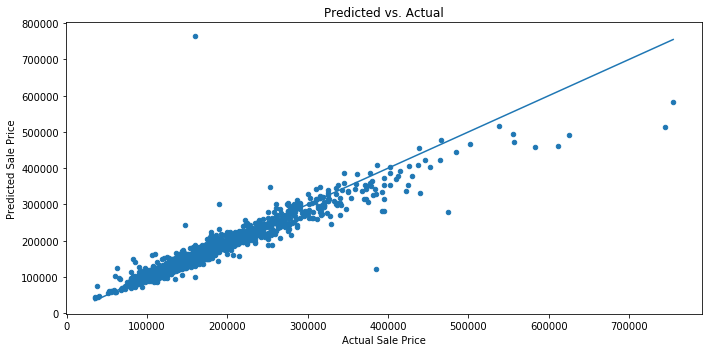

In [12]:
pred_train = np.exp(sess.run(k, feed_dict={x1: x_train, keep_prob : 1}))

plt.figure(figsize=(10, 5))
plt.scatter(y_train, pred_train, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.tight_layout()

sess.close()
print(rmsle(y_train,pred_train))

### train 전체 데이터로 학습, test로 predict

In [13]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

###
batch_size = x_train.shape[0]

# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])

j=0

for _ in range(step):
    j += 1
    
    batch_count = int(math.ceil(x_train.shape[0]/batch_size))
    for i in range(batch_count):
        batch_xs, batch_ys = x_train[batch_size * i : batch_size*(i+1)], y_train_log[batch_size * i : batch_size*(i+1)]
        sess.run(train_step,
                            feed_dict={x1: batch_xs, y_: batch_ys, keep_prob:keepout, lr : learning_rate})
        summary = sess.run(merged,
                            feed_dict={x1:  x_train, y_: y_train_log, keep_prob:keepout, lr : learning_rate})
        train_writer.add_summary(summary, j)
        if i % 300 == 0:
            print('step : {}, batch : {}'.format(j, i), end='\t')
            print ('loss :',sess.run(cost, feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout, lr : learning_rate}))


print ("Testing model")
# Test trained model
y_test = pd.read_csv('./data/submission.csv', engine='python')
hidden1_pred = np.exp(sess.run(k, feed_dict={x1: x_test, keep_prob : 1}))

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (hidden1_pred)
print(submission)
submission.to_csv('./output_csv/MLP_tensorflow_all_normalize_skewed.csv', index=False)

train_writer.close()
sess.close()

Training

step : 1, batch : 0	loss : 114.31452
step : 2, batch : 0	loss : 91.49311
step : 3, batch : 0	loss : 70.37965
step : 4, batch : 0	loss : 50.977848
step : 5, batch : 0	loss : 35.31451
step : 6, batch : 0	loss : 21.538109
step : 7, batch : 0	loss : 11.427233
step : 8, batch : 0	loss : 4.993972
step : 9, batch : 0	loss : 2.961994
step : 10, batch : 0	loss : 5.105952
step : 11, batch : 0	loss : 9.306266
step : 12, batch : 0	loss : 14.592131
step : 13, batch : 0	loss : 16.86133
step : 14, batch : 0	loss : 16.266703
step : 15, batch : 0	loss : 15.520062
step : 16, batch : 0	loss : 12.426146
step : 17, batch : 0	loss : 8.964346
step : 18, batch : 0	loss : 6.557437
step : 19, batch : 0	loss : 4.476371
step : 20, batch : 0	loss : 3.3972042
step : 21, batch : 0	loss : 3.085081
step : 22, batch : 0	loss : 3.38952
step : 23, batch : 0	loss : 3.7322006
step : 24, batch : 0	loss : 4.4949713
step : 25, batch : 0	loss : 5.3742843
step : 26, batch : 0	loss : 5.78095
step : 27, batch : 0	loss :

step : 217, batch : 0	loss : 1.6593741
step : 218, batch : 0	loss : 1.5876595
step : 219, batch : 0	loss : 1.6053963
step : 220, batch : 0	loss : 1.7101109
step : 221, batch : 0	loss : 1.5935916
step : 222, batch : 0	loss : 1.7644535
step : 223, batch : 0	loss : 1.5782075
step : 224, batch : 0	loss : 1.6481377
step : 225, batch : 0	loss : 1.6970688
step : 226, batch : 0	loss : 1.5988168
step : 227, batch : 0	loss : 1.7125064
step : 228, batch : 0	loss : 1.6312035
step : 229, batch : 0	loss : 1.6092383
step : 230, batch : 0	loss : 1.542757
step : 231, batch : 0	loss : 1.665914
step : 232, batch : 0	loss : 1.6113094
step : 233, batch : 0	loss : 1.5917135
step : 234, batch : 0	loss : 1.6081017
step : 235, batch : 0	loss : 1.7497905
step : 236, batch : 0	loss : 1.5988206
step : 237, batch : 0	loss : 1.6332791
step : 238, batch : 0	loss : 1.6157725
step : 239, batch : 0	loss : 1.6811626
step : 240, batch : 0	loss : 1.5783039
step : 241, batch : 0	loss : 1.5896585
step : 242, batch : 0	loss 

step : 431, batch : 0	loss : 1.3566101
step : 432, batch : 0	loss : 1.3779744
step : 433, batch : 0	loss : 1.4088705
step : 434, batch : 0	loss : 1.3148433
step : 435, batch : 0	loss : 1.389208
step : 436, batch : 0	loss : 1.4681656
step : 437, batch : 0	loss : 1.3917931
step : 438, batch : 0	loss : 1.3968515
step : 439, batch : 0	loss : 1.364971
step : 440, batch : 0	loss : 1.3804848
step : 441, batch : 0	loss : 1.3189772
step : 442, batch : 0	loss : 1.3698113
step : 443, batch : 0	loss : 1.3701859
step : 444, batch : 0	loss : 1.4615061
step : 445, batch : 0	loss : 1.3242987
step : 446, batch : 0	loss : 1.3264002
step : 447, batch : 0	loss : 1.447137
step : 448, batch : 0	loss : 1.2698042
step : 449, batch : 0	loss : 1.4565467
step : 450, batch : 0	loss : 1.3373826
step : 451, batch : 0	loss : 1.3912643
step : 452, batch : 0	loss : 1.3471606
step : 453, batch : 0	loss : 1.3645425
step : 454, batch : 0	loss : 1.373649
step : 455, batch : 0	loss : 1.3397682
step : 456, batch : 0	loss : 

step : 646, batch : 0	loss : 1.3293052
step : 647, batch : 0	loss : 1.3226914
step : 648, batch : 0	loss : 1.375042
step : 649, batch : 0	loss : 1.3025757
step : 650, batch : 0	loss : 1.3679539
step : 651, batch : 0	loss : 1.3011299
step : 652, batch : 0	loss : 1.1675084
step : 653, batch : 0	loss : 1.2778516
step : 654, batch : 0	loss : 1.3023524
step : 655, batch : 0	loss : 1.3005631
step : 656, batch : 0	loss : 1.3645945
step : 657, batch : 0	loss : 1.3070381
step : 658, batch : 0	loss : 1.3422813
step : 659, batch : 0	loss : 1.2659824
step : 660, batch : 0	loss : 1.4016376
step : 661, batch : 0	loss : 1.3605413
step : 662, batch : 0	loss : 1.3407506
step : 663, batch : 0	loss : 1.3276254
step : 664, batch : 0	loss : 1.2937799
step : 665, batch : 0	loss : 1.3193517
step : 666, batch : 0	loss : 1.1763059
step : 667, batch : 0	loss : 1.2909483
step : 668, batch : 0	loss : 1.3363707
step : 669, batch : 0	loss : 1.2913618
step : 670, batch : 0	loss : 1.335801
step : 671, batch : 0	loss 

step : 857, batch : 0	loss : 1.2091078
step : 858, batch : 0	loss : 1.24958
step : 859, batch : 0	loss : 1.2105451
step : 860, batch : 0	loss : 1.2288253
step : 861, batch : 0	loss : 1.2945603
step : 862, batch : 0	loss : 1.2692354
step : 863, batch : 0	loss : 1.298741
step : 864, batch : 0	loss : 1.2328533
step : 865, batch : 0	loss : 1.2702364
step : 866, batch : 0	loss : 1.2708812
step : 867, batch : 0	loss : 1.2138376
step : 868, batch : 0	loss : 1.3213795
step : 869, batch : 0	loss : 1.2526789
step : 870, batch : 0	loss : 1.2470516
step : 871, batch : 0	loss : 1.3603203
step : 872, batch : 0	loss : 1.2662125
step : 873, batch : 0	loss : 1.2129382
step : 874, batch : 0	loss : 1.3266538
step : 875, batch : 0	loss : 1.274438
step : 876, batch : 0	loss : 1.2265128
step : 877, batch : 0	loss : 1.3227599
step : 878, batch : 0	loss : 1.2161574
step : 879, batch : 0	loss : 1.2291447
step : 880, batch : 0	loss : 1.3152965
step : 881, batch : 0	loss : 1.1888531
step : 882, batch : 0	loss : 

step : 1067, batch : 0	loss : 1.2542436
step : 1068, batch : 0	loss : 1.1699172
step : 1069, batch : 0	loss : 1.2203798
step : 1070, batch : 0	loss : 1.239594
step : 1071, batch : 0	loss : 1.2291659
step : 1072, batch : 0	loss : 1.2572037
step : 1073, batch : 0	loss : 1.2592713
step : 1074, batch : 0	loss : 1.2001884
step : 1075, batch : 0	loss : 1.1740391
step : 1076, batch : 0	loss : 1.2408884
step : 1077, batch : 0	loss : 1.2573488
step : 1078, batch : 0	loss : 1.2430372
step : 1079, batch : 0	loss : 1.2479043
step : 1080, batch : 0	loss : 1.1832602
step : 1081, batch : 0	loss : 1.1908334
step : 1082, batch : 0	loss : 1.1973885
step : 1083, batch : 0	loss : 1.2366433
step : 1084, batch : 0	loss : 1.1904459
step : 1085, batch : 0	loss : 1.225527
step : 1086, batch : 0	loss : 1.2023147
step : 1087, batch : 0	loss : 1.2599913
step : 1088, batch : 0	loss : 1.3044064
step : 1089, batch : 0	loss : 1.1990507
step : 1090, batch : 0	loss : 1.1722195
step : 1091, batch : 0	loss : 1.1983287
st

step : 1275, batch : 0	loss : 1.2040492
step : 1276, batch : 0	loss : 1.1443237
step : 1277, batch : 0	loss : 1.2137907
step : 1278, batch : 0	loss : 1.2423931
step : 1279, batch : 0	loss : 1.1646143
step : 1280, batch : 0	loss : 1.2526582
step : 1281, batch : 0	loss : 1.119768
step : 1282, batch : 0	loss : 1.1872967
step : 1283, batch : 0	loss : 1.0906417
step : 1284, batch : 0	loss : 1.1944231
step : 1285, batch : 0	loss : 1.1910554
step : 1286, batch : 0	loss : 1.2090813
step : 1287, batch : 0	loss : 1.0960732
step : 1288, batch : 0	loss : 1.1561722
step : 1289, batch : 0	loss : 1.145384
step : 1290, batch : 0	loss : 1.2198291
step : 1291, batch : 0	loss : 1.26114
step : 1292, batch : 0	loss : 1.210032
step : 1293, batch : 0	loss : 1.231508
step : 1294, batch : 0	loss : 1.2057279
step : 1295, batch : 0	loss : 1.237973
step : 1296, batch : 0	loss : 1.1278459
step : 1297, batch : 0	loss : 1.1603769
step : 1298, batch : 0	loss : 1.2338151
step : 1299, batch : 0	loss : 1.2595253
step : 

step : 1481, batch : 0	loss : 1.1357683
step : 1482, batch : 0	loss : 1.2169397
step : 1483, batch : 0	loss : 1.2130665
step : 1484, batch : 0	loss : 1.0688918
step : 1485, batch : 0	loss : 1.1494935
step : 1486, batch : 0	loss : 1.1083736
step : 1487, batch : 0	loss : 1.1358008
step : 1488, batch : 0	loss : 1.086692
step : 1489, batch : 0	loss : 1.1105742
step : 1490, batch : 0	loss : 1.1256584
step : 1491, batch : 0	loss : 1.1557418
step : 1492, batch : 0	loss : 1.1407503
step : 1493, batch : 0	loss : 1.2165582
step : 1494, batch : 0	loss : 1.1248024
step : 1495, batch : 0	loss : 1.2305181
step : 1496, batch : 0	loss : 1.1497391
step : 1497, batch : 0	loss : 1.1700339
step : 1498, batch : 0	loss : 1.1920345
step : 1499, batch : 0	loss : 1.1579064
step : 1500, batch : 0	loss : 1.0892475
step : 1501, batch : 0	loss : 1.1449542
step : 1502, batch : 0	loss : 1.2225115
step : 1503, batch : 0	loss : 1.1169134
step : 1504, batch : 0	loss : 1.1019369
step : 1505, batch : 0	loss : 1.1838698
s

step : 1690, batch : 0	loss : 1.0535383
step : 1691, batch : 0	loss : 1.0774766
step : 1692, batch : 0	loss : 1.1194257
step : 1693, batch : 0	loss : 1.1066101
step : 1694, batch : 0	loss : 1.0839977
step : 1695, batch : 0	loss : 1.1553018
step : 1696, batch : 0	loss : 1.0885102
step : 1697, batch : 0	loss : 0.98715097
step : 1698, batch : 0	loss : 1.0829886
step : 1699, batch : 0	loss : 1.0667787
step : 1700, batch : 0	loss : 1.0966103
step : 1701, batch : 0	loss : 1.0845208
step : 1702, batch : 0	loss : 1.1168579
step : 1703, batch : 0	loss : 1.1462551
step : 1704, batch : 0	loss : 1.043908
step : 1705, batch : 0	loss : 1.165011
step : 1706, batch : 0	loss : 1.1316139
step : 1707, batch : 0	loss : 1.1370239
step : 1708, batch : 0	loss : 1.0319161
step : 1709, batch : 0	loss : 1.1308054
step : 1710, batch : 0	loss : 1.0999726
step : 1711, batch : 0	loss : 1.1168224
step : 1712, batch : 0	loss : 1.1248379
step : 1713, batch : 0	loss : 1.0395627
step : 1714, batch : 0	loss : 1.1720651
s

step : 1898, batch : 0	loss : 1.0710363
step : 1899, batch : 0	loss : 1.1036565
step : 1900, batch : 0	loss : 1.1062478
step : 1901, batch : 0	loss : 1.0732508
step : 1902, batch : 0	loss : 1.1030681
step : 1903, batch : 0	loss : 1.0722034
step : 1904, batch : 0	loss : 1.0663809
step : 1905, batch : 0	loss : 1.0776814
step : 1906, batch : 0	loss : 1.0659137
step : 1907, batch : 0	loss : 1.0440972
step : 1908, batch : 0	loss : 1.0829766
step : 1909, batch : 0	loss : 1.0787226
step : 1910, batch : 0	loss : 1.0063386
step : 1911, batch : 0	loss : 1.2192162
step : 1912, batch : 0	loss : 1.065654
step : 1913, batch : 0	loss : 1.1484598
step : 1914, batch : 0	loss : 1.0785141
step : 1915, batch : 0	loss : 1.1066195
step : 1916, batch : 0	loss : 1.1018081
step : 1917, batch : 0	loss : 1.1419245
step : 1918, batch : 0	loss : 1.0676422
step : 1919, batch : 0	loss : 1.0678258
step : 1920, batch : 0	loss : 0.96623737
step : 1921, batch : 0	loss : 1.0694828
step : 1922, batch : 0	loss : 1.0675746


step : 2106, batch : 0	loss : 1.0000863
step : 2107, batch : 0	loss : 0.9868854
step : 2108, batch : 0	loss : 1.0613052
step : 2109, batch : 0	loss : 1.0407319
step : 2110, batch : 0	loss : 1.0691897
step : 2111, batch : 0	loss : 1.0176729
step : 2112, batch : 0	loss : 1.0639871
step : 2113, batch : 0	loss : 1.0671049
step : 2114, batch : 0	loss : 1.0651267
step : 2115, batch : 0	loss : 1.0180728
step : 2116, batch : 0	loss : 1.0382906
step : 2117, batch : 0	loss : 1.0002072
step : 2118, batch : 0	loss : 1.0370269
step : 2119, batch : 0	loss : 1.0828931
step : 2120, batch : 0	loss : 1.0928372
step : 2121, batch : 0	loss : 1.0930625
step : 2122, batch : 0	loss : 1.0118533
step : 2123, batch : 0	loss : 1.0392703
step : 2124, batch : 0	loss : 1.040452
step : 2125, batch : 0	loss : 1.0762936
step : 2126, batch : 0	loss : 1.014627
step : 2127, batch : 0	loss : 0.9345896
step : 2128, batch : 0	loss : 1.023444
step : 2129, batch : 0	loss : 1.0326347
step : 2130, batch : 0	loss : 0.98434883
st

step : 2310, batch : 0	loss : 0.9745971
step : 2311, batch : 0	loss : 0.9612115
step : 2312, batch : 0	loss : 0.94714415
step : 2313, batch : 0	loss : 0.9949213
step : 2314, batch : 0	loss : 0.96487623
step : 2315, batch : 0	loss : 0.9767534
step : 2316, batch : 0	loss : 0.9335586
step : 2317, batch : 0	loss : 0.99768436
step : 2318, batch : 0	loss : 0.9983973
step : 2319, batch : 0	loss : 0.96618676
step : 2320, batch : 0	loss : 0.8911302
step : 2321, batch : 0	loss : 1.0544342
step : 2322, batch : 0	loss : 0.95049185
step : 2323, batch : 0	loss : 0.9803763
step : 2324, batch : 0	loss : 0.95996857
step : 2325, batch : 0	loss : 0.9658178
step : 2326, batch : 0	loss : 0.9672908
step : 2327, batch : 0	loss : 0.9966715
step : 2328, batch : 0	loss : 1.002552
step : 2329, batch : 0	loss : 0.9520585
step : 2330, batch : 0	loss : 0.9298713
step : 2331, batch : 0	loss : 1.0054603
step : 2332, batch : 0	loss : 0.92571175
step : 2333, batch : 0	loss : 0.9701449
step : 2334, batch : 0	loss : 1.00

step : 2521, batch : 0	loss : 0.93213093
step : 2522, batch : 0	loss : 0.88325435
step : 2523, batch : 0	loss : 0.8906132
step : 2524, batch : 0	loss : 0.9402985
step : 2525, batch : 0	loss : 0.89696586
step : 2526, batch : 0	loss : 0.93586195
step : 2527, batch : 0	loss : 0.9299089
step : 2528, batch : 0	loss : 0.8982452
step : 2529, batch : 0	loss : 0.88392043
step : 2530, batch : 0	loss : 0.92767406
step : 2531, batch : 0	loss : 0.93024796
step : 2532, batch : 0	loss : 0.9763929
step : 2533, batch : 0	loss : 0.8961277
step : 2534, batch : 0	loss : 0.95697254
step : 2535, batch : 0	loss : 0.9443731
step : 2536, batch : 0	loss : 0.89342576
step : 2537, batch : 0	loss : 0.914981
step : 2538, batch : 0	loss : 0.9565191
step : 2539, batch : 0	loss : 0.93276334
step : 2540, batch : 0	loss : 0.92609704
step : 2541, batch : 0	loss : 0.9114397
step : 2542, batch : 0	loss : 0.9427221
step : 2543, batch : 0	loss : 0.9128702
step : 2544, batch : 0	loss : 0.923343
step : 2545, batch : 0	loss : 0

step : 2725, batch : 0	loss : 0.8717456
step : 2726, batch : 0	loss : 0.9301126
step : 2727, batch : 0	loss : 0.8707226
step : 2728, batch : 0	loss : 0.84805995
step : 2729, batch : 0	loss : 0.94183314
step : 2730, batch : 0	loss : 0.83264124
step : 2731, batch : 0	loss : 0.87535673
step : 2732, batch : 0	loss : 0.9086358
step : 2733, batch : 0	loss : 0.86464345
step : 2734, batch : 0	loss : 0.874004
step : 2735, batch : 0	loss : 0.8475248
step : 2736, batch : 0	loss : 0.895178
step : 2737, batch : 0	loss : 0.8646624
step : 2738, batch : 0	loss : 0.94368607
step : 2739, batch : 0	loss : 0.86530626
step : 2740, batch : 0	loss : 0.9719896
step : 2741, batch : 0	loss : 0.8986329
step : 2742, batch : 0	loss : 0.90263987
step : 2743, batch : 0	loss : 0.82458335
step : 2744, batch : 0	loss : 0.92613643
step : 2745, batch : 0	loss : 0.92629486
step : 2746, batch : 0	loss : 0.92427605
step : 2747, batch : 0	loss : 0.9310891
step : 2748, batch : 0	loss : 0.8404091
step : 2749, batch : 0	loss : 

step : 2930, batch : 0	loss : 0.8932623
step : 2931, batch : 0	loss : 0.8067849
step : 2932, batch : 0	loss : 0.8667849
step : 2933, batch : 0	loss : 0.8686441
step : 2934, batch : 0	loss : 0.8461458
step : 2935, batch : 0	loss : 0.8592568
step : 2936, batch : 0	loss : 0.8336543
step : 2937, batch : 0	loss : 0.8623101
step : 2938, batch : 0	loss : 0.8639994
step : 2939, batch : 0	loss : 0.8075401
step : 2940, batch : 0	loss : 0.8273609
step : 2941, batch : 0	loss : 0.93493074
step : 2942, batch : 0	loss : 0.84041935
step : 2943, batch : 0	loss : 0.8767186
step : 2944, batch : 0	loss : 0.86361706
step : 2945, batch : 0	loss : 0.84294033
step : 2946, batch : 0	loss : 0.84610605
step : 2947, batch : 0	loss : 0.8748553
step : 2948, batch : 0	loss : 0.90037256
step : 2949, batch : 0	loss : 0.7999778
step : 2950, batch : 0	loss : 0.8709075
step : 2951, batch : 0	loss : 0.8721447
step : 2952, batch : 0	loss : 0.82646424
step : 2953, batch : 0	loss : 0.87633383
step : 2954, batch : 0	loss : 0.

step : 3134, batch : 0	loss : 0.78135675
step : 3135, batch : 0	loss : 0.8120196
step : 3136, batch : 0	loss : 0.80224955
step : 3137, batch : 0	loss : 0.8347525
step : 3138, batch : 0	loss : 0.79104364
step : 3139, batch : 0	loss : 0.79650486
step : 3140, batch : 0	loss : 0.824202
step : 3141, batch : 0	loss : 0.7867675
step : 3142, batch : 0	loss : 0.82705843
step : 3143, batch : 0	loss : 0.7946746
step : 3144, batch : 0	loss : 0.8322689
step : 3145, batch : 0	loss : 0.8101092
step : 3146, batch : 0	loss : 0.83211666
step : 3147, batch : 0	loss : 0.7864167
step : 3148, batch : 0	loss : 0.8521098
step : 3149, batch : 0	loss : 0.8538302
step : 3150, batch : 0	loss : 0.8386738
step : 3151, batch : 0	loss : 0.7925431
step : 3152, batch : 0	loss : 0.8656273
step : 3153, batch : 0	loss : 0.7944241
step : 3154, batch : 0	loss : 0.7646532
step : 3155, batch : 0	loss : 0.8249213
step : 3156, batch : 0	loss : 0.8271064
step : 3157, batch : 0	loss : 0.79628253
step : 3158, batch : 0	loss : 0.80

step : 3339, batch : 0	loss : 0.7844827
step : 3340, batch : 0	loss : 0.7878236
step : 3341, batch : 0	loss : 0.7927098
step : 3342, batch : 0	loss : 0.7881914
step : 3343, batch : 0	loss : 0.7604574
step : 3344, batch : 0	loss : 0.8328476
step : 3345, batch : 0	loss : 0.7818305
step : 3346, batch : 0	loss : 0.7165318
step : 3347, batch : 0	loss : 0.7466345
step : 3348, batch : 0	loss : 0.7851483
step : 3349, batch : 0	loss : 0.7471368
step : 3350, batch : 0	loss : 0.78374755
step : 3351, batch : 0	loss : 0.76824147
step : 3352, batch : 0	loss : 0.76530826
step : 3353, batch : 0	loss : 0.787241
step : 3354, batch : 0	loss : 0.76207125
step : 3355, batch : 0	loss : 0.7250221
step : 3356, batch : 0	loss : 0.7899023
step : 3357, batch : 0	loss : 0.74241304
step : 3358, batch : 0	loss : 0.7481123
step : 3359, batch : 0	loss : 0.7391782
step : 3360, batch : 0	loss : 0.78952503
step : 3361, batch : 0	loss : 0.73375165
step : 3362, batch : 0	loss : 0.79125917
step : 3363, batch : 0	loss : 0.7

step : 3553, batch : 0	loss : 0.74894613
step : 3554, batch : 0	loss : 0.6947418
step : 3555, batch : 0	loss : 0.74860954
step : 3556, batch : 0	loss : 0.7502126
step : 3557, batch : 0	loss : 0.7049758
step : 3558, batch : 0	loss : 0.77701133
step : 3559, batch : 0	loss : 0.7043444
step : 3560, batch : 0	loss : 0.77049035
step : 3561, batch : 0	loss : 0.7247613
step : 3562, batch : 0	loss : 0.72319156
step : 3563, batch : 0	loss : 0.79675895
step : 3564, batch : 0	loss : 0.7426596
step : 3565, batch : 0	loss : 0.72447836
step : 3566, batch : 0	loss : 0.7351976
step : 3567, batch : 0	loss : 0.7164987
step : 3568, batch : 0	loss : 0.7716215
step : 3569, batch : 0	loss : 0.74841326
step : 3570, batch : 0	loss : 0.71951914
step : 3571, batch : 0	loss : 0.7510594
step : 3572, batch : 0	loss : 0.7103241
step : 3573, batch : 0	loss : 0.7608676
step : 3574, batch : 0	loss : 0.7142651
step : 3575, batch : 0	loss : 0.7668898
step : 3576, batch : 0	loss : 0.77021587
step : 3577, batch : 0	loss : 

step : 3758, batch : 0	loss : 0.7348606
step : 3759, batch : 0	loss : 0.66620606
step : 3760, batch : 0	loss : 0.7184994
step : 3761, batch : 0	loss : 0.6789397
step : 3762, batch : 0	loss : 0.67925155
step : 3763, batch : 0	loss : 0.6579428
step : 3764, batch : 0	loss : 0.6935949
step : 3765, batch : 0	loss : 0.6992428
step : 3766, batch : 0	loss : 0.6881588
step : 3767, batch : 0	loss : 0.6940718
step : 3768, batch : 0	loss : 0.677025
step : 3769, batch : 0	loss : 0.7098179
step : 3770, batch : 0	loss : 0.67708117
step : 3771, batch : 0	loss : 0.68893206
step : 3772, batch : 0	loss : 0.6955184
step : 3773, batch : 0	loss : 0.6720543
step : 3774, batch : 0	loss : 0.71783584
step : 3775, batch : 0	loss : 0.7032721
step : 3776, batch : 0	loss : 0.68806976
step : 3777, batch : 0	loss : 0.70640093
step : 3778, batch : 0	loss : 0.7120435
step : 3779, batch : 0	loss : 0.6287751
step : 3780, batch : 0	loss : 0.67993397
step : 3781, batch : 0	loss : 0.6535776
step : 3782, batch : 0	loss : 0.6

step : 3962, batch : 0	loss : 0.64987934
step : 3963, batch : 0	loss : 0.6623983
step : 3964, batch : 0	loss : 0.63794655
step : 3965, batch : 0	loss : 0.6748938
step : 3966, batch : 0	loss : 0.62959045
step : 3967, batch : 0	loss : 0.67310375
step : 3968, batch : 0	loss : 0.5946956
step : 3969, batch : 0	loss : 0.59841573
step : 3970, batch : 0	loss : 0.61275756
step : 3971, batch : 0	loss : 0.64405185
step : 3972, batch : 0	loss : 0.62300515
step : 3973, batch : 0	loss : 0.6594287
step : 3974, batch : 0	loss : 0.6314748
step : 3975, batch : 0	loss : 0.5977603
step : 3976, batch : 0	loss : 0.61675495
step : 3977, batch : 0	loss : 0.64037997
step : 3978, batch : 0	loss : 0.67293066
step : 3979, batch : 0	loss : 0.62531304
step : 3980, batch : 0	loss : 0.587716
step : 3981, batch : 0	loss : 0.63773483
step : 3982, batch : 0	loss : 0.64217496
step : 3983, batch : 0	loss : 0.6820785
step : 3984, batch : 0	loss : 0.65716815
step : 3985, batch : 0	loss : 0.60237163
step : 3986, batch : 0	lo

step : 4165, batch : 0	loss : 0.6111071
step : 4166, batch : 0	loss : 0.604876
step : 4167, batch : 0	loss : 0.59873474
step : 4168, batch : 0	loss : 0.6390316
step : 4169, batch : 0	loss : 0.5748265
step : 4170, batch : 0	loss : 0.60773456
step : 4171, batch : 0	loss : 0.6016078
step : 4172, batch : 0	loss : 0.62151146
step : 4173, batch : 0	loss : 0.59528005
step : 4174, batch : 0	loss : 0.59585327
step : 4175, batch : 0	loss : 0.5862033
step : 4176, batch : 0	loss : 0.60265374
step : 4177, batch : 0	loss : 0.5610995
step : 4178, batch : 0	loss : 0.61734164
step : 4179, batch : 0	loss : 0.63326675
step : 4180, batch : 0	loss : 0.6426587
step : 4181, batch : 0	loss : 0.61456794
step : 4182, batch : 0	loss : 0.5854476
step : 4183, batch : 0	loss : 0.57536715
step : 4184, batch : 0	loss : 0.59739816
step : 4185, batch : 0	loss : 0.5557451
step : 4186, batch : 0	loss : 0.56131387
step : 4187, batch : 0	loss : 0.6015021
step : 4188, batch : 0	loss : 0.5572862
step : 4189, batch : 0	loss :

step : 4372, batch : 0	loss : 0.5405189
step : 4373, batch : 0	loss : 0.63151604
step : 4374, batch : 0	loss : 0.5642586
step : 4375, batch : 0	loss : 0.58056647
step : 4376, batch : 0	loss : 0.5549666
step : 4377, batch : 0	loss : 0.58491844
step : 4378, batch : 0	loss : 0.5621715
step : 4379, batch : 0	loss : 0.56041145
step : 4380, batch : 0	loss : 0.5673039
step : 4381, batch : 0	loss : 0.5644052
step : 4382, batch : 0	loss : 0.5374591
step : 4383, batch : 0	loss : 0.5585486
step : 4384, batch : 0	loss : 0.554481
step : 4385, batch : 0	loss : 0.51712835
step : 4386, batch : 0	loss : 0.534234
step : 4387, batch : 0	loss : 0.5667978
step : 4388, batch : 0	loss : 0.5685491
step : 4389, batch : 0	loss : 0.5435785
step : 4390, batch : 0	loss : 0.5497582
step : 4391, batch : 0	loss : 0.57694495
step : 4392, batch : 0	loss : 0.54682523
step : 4393, batch : 0	loss : 0.5613765
step : 4394, batch : 0	loss : 0.53058654
step : 4395, batch : 0	loss : 0.56481093
step : 4396, batch : 0	loss : 0.5

step : 4581, batch : 0	loss : 0.49408644
step : 4582, batch : 0	loss : 0.55713856
step : 4583, batch : 0	loss : 0.52800274
step : 4584, batch : 0	loss : 0.48438838
step : 4585, batch : 0	loss : 0.4978351
step : 4586, batch : 0	loss : 0.5396127
step : 4587, batch : 0	loss : 0.5341012
step : 4588, batch : 0	loss : 0.52442014
step : 4589, batch : 0	loss : 0.4965356
step : 4590, batch : 0	loss : 0.50986785
step : 4591, batch : 0	loss : 0.52625614
step : 4592, batch : 0	loss : 0.52941394
step : 4593, batch : 0	loss : 0.50130737
step : 4594, batch : 0	loss : 0.5068784
step : 4595, batch : 0	loss : 0.50646627
step : 4596, batch : 0	loss : 0.5143528
step : 4597, batch : 0	loss : 0.56359774
step : 4598, batch : 0	loss : 0.4746907
step : 4599, batch : 0	loss : 0.5427492
step : 4600, batch : 0	loss : 0.52389795
step : 4601, batch : 0	loss : 0.52847433
step : 4602, batch : 0	loss : 0.513606
step : 4603, batch : 0	loss : 0.5283359
step : 4604, batch : 0	loss : 0.5239435
step : 4605, batch : 0	loss 

step : 4784, batch : 0	loss : 0.46978295
step : 4785, batch : 0	loss : 0.4753955
step : 4786, batch : 0	loss : 0.48362467
step : 4787, batch : 0	loss : 0.48402348
step : 4788, batch : 0	loss : 0.49292397
step : 4789, batch : 0	loss : 0.4757681
step : 4790, batch : 0	loss : 0.4735504
step : 4791, batch : 0	loss : 0.51330024
step : 4792, batch : 0	loss : 0.49191904
step : 4793, batch : 0	loss : 0.47854742
step : 4794, batch : 0	loss : 0.4857738
step : 4795, batch : 0	loss : 0.48411083
step : 4796, batch : 0	loss : 0.48096058
step : 4797, batch : 0	loss : 0.49242005
step : 4798, batch : 0	loss : 0.45933694
step : 4799, batch : 0	loss : 0.45768276
step : 4800, batch : 0	loss : 0.48602152
step : 4801, batch : 0	loss : 0.46478492
step : 4802, batch : 0	loss : 0.47402638
step : 4803, batch : 0	loss : 0.4736618
step : 4804, batch : 0	loss : 0.49101523
step : 4805, batch : 0	loss : 0.4657774
step : 4806, batch : 0	loss : 0.47472832
step : 4807, batch : 0	loss : 0.48366886
step : 4808, batch : 0

step : 4986, batch : 0	loss : 0.43241292
step : 4987, batch : 0	loss : 0.46561608
step : 4988, batch : 0	loss : 0.4263714
step : 4989, batch : 0	loss : 0.42907435
step : 4990, batch : 0	loss : 0.45669416
step : 4991, batch : 0	loss : 0.45839143
step : 4992, batch : 0	loss : 0.446136
step : 4993, batch : 0	loss : 0.4141263
step : 4994, batch : 0	loss : 0.42137852
step : 4995, batch : 0	loss : 0.43940485
step : 4996, batch : 0	loss : 0.43370152
step : 4997, batch : 0	loss : 0.4405379
step : 4998, batch : 0	loss : 0.41722542
step : 4999, batch : 0	loss : 0.4383995
step : 5000, batch : 0	loss : 0.44025198
step : 5001, batch : 0	loss : 0.45073676
step : 5002, batch : 0	loss : 0.4311236
step : 5003, batch : 0	loss : 0.42378002
step : 5004, batch : 0	loss : 0.45460272
step : 5005, batch : 0	loss : 0.42477652
step : 5006, batch : 0	loss : 0.42952463
step : 5007, batch : 0	loss : 0.439903
step : 5008, batch : 0	loss : 0.43435758
step : 5009, batch : 0	loss : 0.42341816
step : 5010, batch : 0	lo

step : 5190, batch : 0	loss : 0.4234269
step : 5191, batch : 0	loss : 0.427824
step : 5192, batch : 0	loss : 0.3950618
step : 5193, batch : 0	loss : 0.4422292
step : 5194, batch : 0	loss : 0.3939691
step : 5195, batch : 0	loss : 0.40890497
step : 5196, batch : 0	loss : 0.39259592
step : 5197, batch : 0	loss : 0.38432544
step : 5198, batch : 0	loss : 0.38322848
step : 5199, batch : 0	loss : 0.40644595
step : 5200, batch : 0	loss : 0.38720652
step : 5201, batch : 0	loss : 0.39166343
step : 5202, batch : 0	loss : 0.40350437
step : 5203, batch : 0	loss : 0.3906488
step : 5204, batch : 0	loss : 0.40621528
step : 5205, batch : 0	loss : 0.42064196
step : 5206, batch : 0	loss : 0.43833798
step : 5207, batch : 0	loss : 0.4198623
step : 5208, batch : 0	loss : 0.40492642
step : 5209, batch : 0	loss : 0.40663555
step : 5210, batch : 0	loss : 0.3959
step : 5211, batch : 0	loss : 0.407011
step : 5212, batch : 0	loss : 0.40638977
step : 5213, batch : 0	loss : 0.4013383
step : 5214, batch : 0	loss : 0

step : 5395, batch : 0	loss : 0.37458447
step : 5396, batch : 0	loss : 0.38728216
step : 5397, batch : 0	loss : 0.37400594
step : 5398, batch : 0	loss : 0.36815608
step : 5399, batch : 0	loss : 0.36944374
step : 5400, batch : 0	loss : 0.3768273
step : 5401, batch : 0	loss : 0.39975488
step : 5402, batch : 0	loss : 0.36245543
step : 5403, batch : 0	loss : 0.3741627
step : 5404, batch : 0	loss : 0.38300443
step : 5405, batch : 0	loss : 0.39886078
step : 5406, batch : 0	loss : 0.37727177
step : 5407, batch : 0	loss : 0.39689744
step : 5408, batch : 0	loss : 0.38635316
step : 5409, batch : 0	loss : 0.3658012
step : 5410, batch : 0	loss : 0.35337317
step : 5411, batch : 0	loss : 0.3734558
step : 5412, batch : 0	loss : 0.37070826
step : 5413, batch : 0	loss : 0.38329104
step : 5414, batch : 0	loss : 0.38691625
step : 5415, batch : 0	loss : 0.38527733
step : 5416, batch : 0	loss : 0.36743504
step : 5417, batch : 0	loss : 0.3867396
step : 5418, batch : 0	loss : 0.3649928
step : 5419, batch : 0

step : 5598, batch : 0	loss : 0.3248787
step : 5599, batch : 0	loss : 0.35108623
step : 5600, batch : 0	loss : 0.34044707
step : 5601, batch : 0	loss : 0.3569997
step : 5602, batch : 0	loss : 0.30532575
step : 5603, batch : 0	loss : 0.32878548
step : 5604, batch : 0	loss : 0.33412644
step : 5605, batch : 0	loss : 0.34749845
step : 5606, batch : 0	loss : 0.3267651
step : 5607, batch : 0	loss : 0.33888695
step : 5608, batch : 0	loss : 0.3392518
step : 5609, batch : 0	loss : 0.34350336
step : 5610, batch : 0	loss : 0.33162874
step : 5611, batch : 0	loss : 0.3245055
step : 5612, batch : 0	loss : 0.3522082
step : 5613, batch : 0	loss : 0.34887785
step : 5614, batch : 0	loss : 0.37191677
step : 5615, batch : 0	loss : 0.35094282
step : 5616, batch : 0	loss : 0.34989607
step : 5617, batch : 0	loss : 0.3522537
step : 5618, batch : 0	loss : 0.31550524
step : 5619, batch : 0	loss : 0.32096896
step : 5620, batch : 0	loss : 0.33270493
step : 5621, batch : 0	loss : 0.3465976
step : 5622, batch : 0	l

step : 5808, batch : 0	loss : 0.30894688
step : 5809, batch : 0	loss : 0.32012466
step : 5810, batch : 0	loss : 0.33123323
step : 5811, batch : 0	loss : 0.33216572
step : 5812, batch : 0	loss : 0.30431348
step : 5813, batch : 0	loss : 0.31488234
step : 5814, batch : 0	loss : 0.30074894
step : 5815, batch : 0	loss : 0.30559176
step : 5816, batch : 0	loss : 0.29500178
step : 5817, batch : 0	loss : 0.3032129
step : 5818, batch : 0	loss : 0.31071478
step : 5819, batch : 0	loss : 0.29140073
step : 5820, batch : 0	loss : 0.31310904
step : 5821, batch : 0	loss : 0.30123517
step : 5822, batch : 0	loss : 0.32633698
step : 5823, batch : 0	loss : 0.29751873
step : 5824, batch : 0	loss : 0.3025617
step : 5825, batch : 0	loss : 0.3131414
step : 5826, batch : 0	loss : 0.31518102
step : 5827, batch : 0	loss : 0.30581066
step : 5828, batch : 0	loss : 0.3005907
step : 5829, batch : 0	loss : 0.30039725
step : 5830, batch : 0	loss : 0.31006926
step : 5831, batch : 0	loss : 0.29064676
step : 5832, batch :

step : 6016, batch : 0	loss : 0.2888495
step : 6017, batch : 0	loss : 0.28824207
step : 6018, batch : 0	loss : 0.27968132
step : 6019, batch : 0	loss : 0.27066106
step : 6020, batch : 0	loss : 0.29294813
step : 6021, batch : 0	loss : 0.28294355
step : 6022, batch : 0	loss : 0.30092424
step : 6023, batch : 0	loss : 0.28697693
step : 6024, batch : 0	loss : 0.28456584
step : 6025, batch : 0	loss : 0.29994205
step : 6026, batch : 0	loss : 0.2597857
step : 6027, batch : 0	loss : 0.26509798
step : 6028, batch : 0	loss : 0.29287514
step : 6029, batch : 0	loss : 0.28391337
step : 6030, batch : 0	loss : 0.27909923
step : 6031, batch : 0	loss : 0.26760486
step : 6032, batch : 0	loss : 0.26420593
step : 6033, batch : 0	loss : 0.27199826
step : 6034, batch : 0	loss : 0.2824999
step : 6035, batch : 0	loss : 0.28163338
step : 6036, batch : 0	loss : 0.26474187
step : 6037, batch : 0	loss : 0.28877708
step : 6038, batch : 0	loss : 0.26365066
step : 6039, batch : 0	loss : 0.26746374
step : 6040, batch 

step : 6220, batch : 0	loss : 0.261574
step : 6221, batch : 0	loss : 0.2509103
step : 6222, batch : 0	loss : 0.24842179
step : 6223, batch : 0	loss : 0.24175672
step : 6224, batch : 0	loss : 0.25906226
step : 6225, batch : 0	loss : 0.24870649
step : 6226, batch : 0	loss : 0.23602004
step : 6227, batch : 0	loss : 0.25041166
step : 6228, batch : 0	loss : 0.24673969
step : 6229, batch : 0	loss : 0.24847002
step : 6230, batch : 0	loss : 0.24997556
step : 6231, batch : 0	loss : 0.2527063
step : 6232, batch : 0	loss : 0.2518055
step : 6233, batch : 0	loss : 0.24320589
step : 6234, batch : 0	loss : 0.24512719
step : 6235, batch : 0	loss : 0.24473725
step : 6236, batch : 0	loss : 0.24395534
step : 6237, batch : 0	loss : 0.2678429
step : 6238, batch : 0	loss : 0.25282234
step : 6239, batch : 0	loss : 0.23966484
step : 6240, batch : 0	loss : 0.26237175
step : 6241, batch : 0	loss : 0.25337955
step : 6242, batch : 0	loss : 0.25030977
step : 6243, batch : 0	loss : 0.24370684
step : 6244, batch : 0

step : 6421, batch : 0	loss : 0.23115751
step : 6422, batch : 0	loss : 0.22276516
step : 6423, batch : 0	loss : 0.2367093
step : 6424, batch : 0	loss : 0.23189892
step : 6425, batch : 0	loss : 0.21384363
step : 6426, batch : 0	loss : 0.22826621
step : 6427, batch : 0	loss : 0.2312337
step : 6428, batch : 0	loss : 0.23364574
step : 6429, batch : 0	loss : 0.21786332
step : 6430, batch : 0	loss : 0.21840437
step : 6431, batch : 0	loss : 0.22623628
step : 6432, batch : 0	loss : 0.22063723
step : 6433, batch : 0	loss : 0.23264554
step : 6434, batch : 0	loss : 0.23752023
step : 6435, batch : 0	loss : 0.22971804
step : 6436, batch : 0	loss : 0.2307045
step : 6437, batch : 0	loss : 0.20912474
step : 6438, batch : 0	loss : 0.22649734
step : 6439, batch : 0	loss : 0.21502332
step : 6440, batch : 0	loss : 0.22832905
step : 6441, batch : 0	loss : 0.22085473
step : 6442, batch : 0	loss : 0.20825088
step : 6443, batch : 0	loss : 0.21543293
step : 6444, batch : 0	loss : 0.22015561
step : 6445, batch 

step : 6626, batch : 0	loss : 0.19331326
step : 6627, batch : 0	loss : 0.19886094
step : 6628, batch : 0	loss : 0.20254318
step : 6629, batch : 0	loss : 0.19000483
step : 6630, batch : 0	loss : 0.20771205
step : 6631, batch : 0	loss : 0.19956253
step : 6632, batch : 0	loss : 0.19634481
step : 6633, batch : 0	loss : 0.19635698
step : 6634, batch : 0	loss : 0.20255873
step : 6635, batch : 0	loss : 0.19579835
step : 6636, batch : 0	loss : 0.20525964
step : 6637, batch : 0	loss : 0.19223215
step : 6638, batch : 0	loss : 0.18984963
step : 6639, batch : 0	loss : 0.20629764
step : 6640, batch : 0	loss : 0.20389774
step : 6641, batch : 0	loss : 0.19833243
step : 6642, batch : 0	loss : 0.20063256
step : 6643, batch : 0	loss : 0.19273052
step : 6644, batch : 0	loss : 0.19966808
step : 6645, batch : 0	loss : 0.20661117
step : 6646, batch : 0	loss : 0.20932768
step : 6647, batch : 0	loss : 0.21360251
step : 6648, batch : 0	loss : 0.20934659
step : 6649, batch : 0	loss : 0.18929717
step : 6650, bat

step : 6827, batch : 0	loss : 0.17495567
step : 6828, batch : 0	loss : 0.18151416
step : 6829, batch : 0	loss : 0.17769237
step : 6830, batch : 0	loss : 0.17989096
step : 6831, batch : 0	loss : 0.178713
step : 6832, batch : 0	loss : 0.18158662
step : 6833, batch : 0	loss : 0.17366798
step : 6834, batch : 0	loss : 0.17923363
step : 6835, batch : 0	loss : 0.1897069
step : 6836, batch : 0	loss : 0.1835341
step : 6837, batch : 0	loss : 0.17370497
step : 6838, batch : 0	loss : 0.17669581
step : 6839, batch : 0	loss : 0.19930632
step : 6840, batch : 0	loss : 0.18835838
step : 6841, batch : 0	loss : 0.17144763
step : 6842, batch : 0	loss : 0.17598142
step : 6843, batch : 0	loss : 0.17189793
step : 6844, batch : 0	loss : 0.1844388
step : 6845, batch : 0	loss : 0.17003183
step : 6846, batch : 0	loss : 0.17775485
step : 6847, batch : 0	loss : 0.17154431
step : 6848, batch : 0	loss : 0.18019946
step : 6849, batch : 0	loss : 0.18518165
step : 6850, batch : 0	loss : 0.17416738
step : 6851, batch : 

step : 7029, batch : 0	loss : 0.15804027
step : 7030, batch : 0	loss : 0.1533101
step : 7031, batch : 0	loss : 0.1472656
step : 7032, batch : 0	loss : 0.16149238
step : 7033, batch : 0	loss : 0.16016886
step : 7034, batch : 0	loss : 0.16139317
step : 7035, batch : 0	loss : 0.15839434
step : 7036, batch : 0	loss : 0.1684507
step : 7037, batch : 0	loss : 0.16790916
step : 7038, batch : 0	loss : 0.16164121
step : 7039, batch : 0	loss : 0.15914589
step : 7040, batch : 0	loss : 0.15525863
step : 7041, batch : 0	loss : 0.15876587
step : 7042, batch : 0	loss : 0.14626333
step : 7043, batch : 0	loss : 0.16380885
step : 7044, batch : 0	loss : 0.15256906
step : 7045, batch : 0	loss : 0.16028132
step : 7046, batch : 0	loss : 0.15892486
step : 7047, batch : 0	loss : 0.15942556
step : 7048, batch : 0	loss : 0.16053407
step : 7049, batch : 0	loss : 0.1580324
step : 7050, batch : 0	loss : 0.1521884
step : 7051, batch : 0	loss : 0.1629714
step : 7052, batch : 0	loss : 0.15612262
step : 7053, batch : 0

step : 7231, batch : 0	loss : 0.13023163
step : 7232, batch : 0	loss : 0.14116967
step : 7233, batch : 0	loss : 0.14585984
step : 7234, batch : 0	loss : 0.13334239
step : 7235, batch : 0	loss : 0.13447663
step : 7236, batch : 0	loss : 0.13802674
step : 7237, batch : 0	loss : 0.13651188
step : 7238, batch : 0	loss : 0.14390765
step : 7239, batch : 0	loss : 0.13970146
step : 7240, batch : 0	loss : 0.1364278
step : 7241, batch : 0	loss : 0.13959412
step : 7242, batch : 0	loss : 0.14381137
step : 7243, batch : 0	loss : 0.14621644
step : 7244, batch : 0	loss : 0.12957565
step : 7245, batch : 0	loss : 0.13212444
step : 7246, batch : 0	loss : 0.1400615
step : 7247, batch : 0	loss : 0.13430257
step : 7248, batch : 0	loss : 0.13821612
step : 7249, batch : 0	loss : 0.13964622
step : 7250, batch : 0	loss : 0.14264226
step : 7251, batch : 0	loss : 0.13359256
step : 7252, batch : 0	loss : 0.1376902
step : 7253, batch : 0	loss : 0.12790032
step : 7254, batch : 0	loss : 0.14311858
step : 7255, batch 

step : 7432, batch : 0	loss : 0.122531876
step : 7433, batch : 0	loss : 0.11900997
step : 7434, batch : 0	loss : 0.11449949
step : 7435, batch : 0	loss : 0.12522791
step : 7436, batch : 0	loss : 0.12687407
step : 7437, batch : 0	loss : 0.12531194
step : 7438, batch : 0	loss : 0.12493863
step : 7439, batch : 0	loss : 0.11636985
step : 7440, batch : 0	loss : 0.12997052
step : 7441, batch : 0	loss : 0.11991628
step : 7442, batch : 0	loss : 0.12058777
step : 7443, batch : 0	loss : 0.120170034
step : 7444, batch : 0	loss : 0.119509034
step : 7445, batch : 0	loss : 0.12149525
step : 7446, batch : 0	loss : 0.12689614
step : 7447, batch : 0	loss : 0.122617975
step : 7448, batch : 0	loss : 0.1284756
step : 7449, batch : 0	loss : 0.11509713
step : 7450, batch : 0	loss : 0.12050234
step : 7451, batch : 0	loss : 0.12321794
step : 7452, batch : 0	loss : 0.122087926
step : 7453, batch : 0	loss : 0.120712675
step : 7454, batch : 0	loss : 0.1297577
step : 7455, batch : 0	loss : 0.119078234
step : 7456

step : 7634, batch : 0	loss : 0.10098699
step : 7635, batch : 0	loss : 0.113898985
step : 7636, batch : 0	loss : 0.10684943
step : 7637, batch : 0	loss : 0.11140325
step : 7638, batch : 0	loss : 0.105327554
step : 7639, batch : 0	loss : 0.1095488
step : 7640, batch : 0	loss : 0.10440499
step : 7641, batch : 0	loss : 0.10603186
step : 7642, batch : 0	loss : 0.10248832
step : 7643, batch : 0	loss : 0.10383549
step : 7644, batch : 0	loss : 0.10773346
step : 7645, batch : 0	loss : 0.10328863
step : 7646, batch : 0	loss : 0.10512572
step : 7647, batch : 0	loss : 0.109647766
step : 7648, batch : 0	loss : 0.107593164
step : 7649, batch : 0	loss : 0.10179384
step : 7650, batch : 0	loss : 0.10519606
step : 7651, batch : 0	loss : 0.105920754
step : 7652, batch : 0	loss : 0.10506279
step : 7653, batch : 0	loss : 0.108412296
step : 7654, batch : 0	loss : 0.09942272
step : 7655, batch : 0	loss : 0.10439815
step : 7656, batch : 0	loss : 0.10064096
step : 7657, batch : 0	loss : 0.09994741
step : 7658

step : 7833, batch : 0	loss : 0.09180695
step : 7834, batch : 0	loss : 0.093226045
step : 7835, batch : 0	loss : 0.099657774
step : 7836, batch : 0	loss : 0.096999414
step : 7837, batch : 0	loss : 0.09858441
step : 7838, batch : 0	loss : 0.09221614
step : 7839, batch : 0	loss : 0.092906155
step : 7840, batch : 0	loss : 0.096064396
step : 7841, batch : 0	loss : 0.0946914
step : 7842, batch : 0	loss : 0.09393503
step : 7843, batch : 0	loss : 0.09693386
step : 7844, batch : 0	loss : 0.09353502
step : 7845, batch : 0	loss : 0.09949964
step : 7846, batch : 0	loss : 0.09332301
step : 7847, batch : 0	loss : 0.094373114
step : 7848, batch : 0	loss : 0.09647435
step : 7849, batch : 0	loss : 0.09569601
step : 7850, batch : 0	loss : 0.08877142
step : 7851, batch : 0	loss : 0.09508154
step : 7852, batch : 0	loss : 0.08965451
step : 7853, batch : 0	loss : 0.09376368
step : 7854, batch : 0	loss : 0.09132828
step : 7855, batch : 0	loss : 0.090089604
step : 7856, batch : 0	loss : 0.08700699
step : 785

step : 8032, batch : 0	loss : 0.07652917
step : 8033, batch : 0	loss : 0.08021599
step : 8034, batch : 0	loss : 0.083801836
step : 8035, batch : 0	loss : 0.07795541
step : 8036, batch : 0	loss : 0.079169855
step : 8037, batch : 0	loss : 0.07909688
step : 8038, batch : 0	loss : 0.082172826
step : 8039, batch : 0	loss : 0.079193555
step : 8040, batch : 0	loss : 0.08032526
step : 8041, batch : 0	loss : 0.0829162
step : 8042, batch : 0	loss : 0.077510074
step : 8043, batch : 0	loss : 0.075727135
step : 8044, batch : 0	loss : 0.076697856
step : 8045, batch : 0	loss : 0.077674374
step : 8046, batch : 0	loss : 0.07997388
step : 8047, batch : 0	loss : 0.08283614
step : 8048, batch : 0	loss : 0.07879009
step : 8049, batch : 0	loss : 0.08179849
step : 8050, batch : 0	loss : 0.075820155
step : 8051, batch : 0	loss : 0.07826078
step : 8052, batch : 0	loss : 0.07643353
step : 8053, batch : 0	loss : 0.08468398
step : 8054, batch : 0	loss : 0.083221264
step : 8055, batch : 0	loss : 0.079526015
step :

step : 8236, batch : 0	loss : 0.06736677
step : 8237, batch : 0	loss : 0.07013576
step : 8238, batch : 0	loss : 0.06994498
step : 8239, batch : 0	loss : 0.0676911
step : 8240, batch : 0	loss : 0.06641487
step : 8241, batch : 0	loss : 0.07020899
step : 8242, batch : 0	loss : 0.06724518
step : 8243, batch : 0	loss : 0.074169405
step : 8244, batch : 0	loss : 0.06573367
step : 8245, batch : 0	loss : 0.06707784
step : 8246, batch : 0	loss : 0.07007999
step : 8247, batch : 0	loss : 0.06623977
step : 8248, batch : 0	loss : 0.066360734
step : 8249, batch : 0	loss : 0.06627915
step : 8250, batch : 0	loss : 0.06694144
step : 8251, batch : 0	loss : 0.07061615
step : 8252, batch : 0	loss : 0.06301605
step : 8253, batch : 0	loss : 0.07670939
step : 8254, batch : 0	loss : 0.06329234
step : 8255, batch : 0	loss : 0.07389656
step : 8256, batch : 0	loss : 0.06647411
step : 8257, batch : 0	loss : 0.06798942
step : 8258, batch : 0	loss : 0.067402616
step : 8259, batch : 0	loss : 0.0664385
step : 8260, ba

step : 8435, batch : 0	loss : 0.058500756
step : 8436, batch : 0	loss : 0.060888667
step : 8437, batch : 0	loss : 0.05908107
step : 8438, batch : 0	loss : 0.057154868
step : 8439, batch : 0	loss : 0.055841763
step : 8440, batch : 0	loss : 0.05984416
step : 8441, batch : 0	loss : 0.056958664
step : 8442, batch : 0	loss : 0.05780684
step : 8443, batch : 0	loss : 0.055147845
step : 8444, batch : 0	loss : 0.056317434
step : 8445, batch : 0	loss : 0.05542916
step : 8446, batch : 0	loss : 0.059624974
step : 8447, batch : 0	loss : 0.060460255
step : 8448, batch : 0	loss : 0.06187992
step : 8449, batch : 0	loss : 0.059410613
step : 8450, batch : 0	loss : 0.055466227
step : 8451, batch : 0	loss : 0.057466127
step : 8452, batch : 0	loss : 0.057912663
step : 8453, batch : 0	loss : 0.0593327
step : 8454, batch : 0	loss : 0.05867556
step : 8455, batch : 0	loss : 0.0591033
step : 8456, batch : 0	loss : 0.05477097
step : 8457, batch : 0	loss : 0.054900654
step : 8458, batch : 0	loss : 0.05540503
step

step : 8633, batch : 0	loss : 0.051408168
step : 8634, batch : 0	loss : 0.048874404
step : 8635, batch : 0	loss : 0.049876276
step : 8636, batch : 0	loss : 0.049096074
step : 8637, batch : 0	loss : 0.04621839
step : 8638, batch : 0	loss : 0.047753856
step : 8639, batch : 0	loss : 0.049146757
step : 8640, batch : 0	loss : 0.04664178
step : 8641, batch : 0	loss : 0.046229135
step : 8642, batch : 0	loss : 0.05025447
step : 8643, batch : 0	loss : 0.04761892
step : 8644, batch : 0	loss : 0.048900485
step : 8645, batch : 0	loss : 0.048657935
step : 8646, batch : 0	loss : 0.049457323
step : 8647, batch : 0	loss : 0.04841758
step : 8648, batch : 0	loss : 0.050958265
step : 8649, batch : 0	loss : 0.045735672
step : 8650, batch : 0	loss : 0.049774855
step : 8651, batch : 0	loss : 0.047655508
step : 8652, batch : 0	loss : 0.047200292
step : 8653, batch : 0	loss : 0.04862071
step : 8654, batch : 0	loss : 0.047639415
step : 8655, batch : 0	loss : 0.04566664
step : 8656, batch : 0	loss : 0.04684729


step : 8836, batch : 0	loss : 0.043315902
step : 8837, batch : 0	loss : 0.041405674
step : 8838, batch : 0	loss : 0.043769985
step : 8839, batch : 0	loss : 0.04172648
step : 8840, batch : 0	loss : 0.04273516
step : 8841, batch : 0	loss : 0.042302262
step : 8842, batch : 0	loss : 0.04236437
step : 8843, batch : 0	loss : 0.042361856
step : 8844, batch : 0	loss : 0.04115124
step : 8845, batch : 0	loss : 0.03693375
step : 8846, batch : 0	loss : 0.0401344
step : 8847, batch : 0	loss : 0.04157162
step : 8848, batch : 0	loss : 0.04399369
step : 8849, batch : 0	loss : 0.03895123
step : 8850, batch : 0	loss : 0.041572306
step : 8851, batch : 0	loss : 0.041415166
step : 8852, batch : 0	loss : 0.04141319
step : 8853, batch : 0	loss : 0.03936241
step : 8854, batch : 0	loss : 0.03948018
step : 8855, batch : 0	loss : 0.04223137
step : 8856, batch : 0	loss : 0.03981875
step : 8857, batch : 0	loss : 0.04066396
step : 8858, batch : 0	loss : 0.041323904
step : 8859, batch : 0	loss : 0.038682193
step : 8

step : 9034, batch : 0	loss : 0.03617093
step : 9035, batch : 0	loss : 0.035478838
step : 9036, batch : 0	loss : 0.03390349
step : 9037, batch : 0	loss : 0.034195334
step : 9038, batch : 0	loss : 0.03563751
step : 9039, batch : 0	loss : 0.035822105
step : 9040, batch : 0	loss : 0.034290038
step : 9041, batch : 0	loss : 0.03449692
step : 9042, batch : 0	loss : 0.03584325
step : 9043, batch : 0	loss : 0.033362176
step : 9044, batch : 0	loss : 0.03460047
step : 9045, batch : 0	loss : 0.0330308
step : 9046, batch : 0	loss : 0.03445223
step : 9047, batch : 0	loss : 0.03331769
step : 9048, batch : 0	loss : 0.03231977
step : 9049, batch : 0	loss : 0.034202624
step : 9050, batch : 0	loss : 0.034559943
step : 9051, batch : 0	loss : 0.035114933
step : 9052, batch : 0	loss : 0.033889905
step : 9053, batch : 0	loss : 0.033678196
step : 9054, batch : 0	loss : 0.03611541
step : 9055, batch : 0	loss : 0.0355305
step : 9056, batch : 0	loss : 0.034507092
step : 9057, batch : 0	loss : 0.03371686
step : 

step : 9231, batch : 0	loss : 0.030794242
step : 9232, batch : 0	loss : 0.028364586
step : 9233, batch : 0	loss : 0.029037775
step : 9234, batch : 0	loss : 0.029454872
step : 9235, batch : 0	loss : 0.02786213
step : 9236, batch : 0	loss : 0.030899817
step : 9237, batch : 0	loss : 0.029475057
step : 9238, batch : 0	loss : 0.027485652
step : 9239, batch : 0	loss : 0.028046664
step : 9240, batch : 0	loss : 0.028683089
step : 9241, batch : 0	loss : 0.030159658
step : 9242, batch : 0	loss : 0.028178938
step : 9243, batch : 0	loss : 0.02932864
step : 9244, batch : 0	loss : 0.02963009
step : 9245, batch : 0	loss : 0.030254481
step : 9246, batch : 0	loss : 0.029957011
step : 9247, batch : 0	loss : 0.028859997
step : 9248, batch : 0	loss : 0.029347735
step : 9249, batch : 0	loss : 0.029382464
step : 9250, batch : 0	loss : 0.029392023
step : 9251, batch : 0	loss : 0.027114991
step : 9252, batch : 0	loss : 0.028852614
step : 9253, batch : 0	loss : 0.028275961
step : 9254, batch : 0	loss : 0.02869

step : 9429, batch : 0	loss : 0.024908723
step : 9430, batch : 0	loss : 0.023995534
step : 9431, batch : 0	loss : 0.024524476
step : 9432, batch : 0	loss : 0.025403889
step : 9433, batch : 0	loss : 0.024345722
step : 9434, batch : 0	loss : 0.024856586
step : 9435, batch : 0	loss : 0.024084866
step : 9436, batch : 0	loss : 0.02504278
step : 9437, batch : 0	loss : 0.025953634
step : 9438, batch : 0	loss : 0.02347303
step : 9439, batch : 0	loss : 0.025227461
step : 9440, batch : 0	loss : 0.024603195
step : 9441, batch : 0	loss : 0.022298433
step : 9442, batch : 0	loss : 0.026179206
step : 9443, batch : 0	loss : 0.02444838
step : 9444, batch : 0	loss : 0.02634404
step : 9445, batch : 0	loss : 0.023330417
step : 9446, batch : 0	loss : 0.024890997
step : 9447, batch : 0	loss : 0.0237469
step : 9448, batch : 0	loss : 0.025493575
step : 9449, batch : 0	loss : 0.023871707
step : 9450, batch : 0	loss : 0.023717357
step : 9451, batch : 0	loss : 0.023201156
step : 9452, batch : 0	loss : 0.02429265

step : 9626, batch : 0	loss : 0.02112312
step : 9627, batch : 0	loss : 0.022692716
step : 9628, batch : 0	loss : 0.021151705
step : 9629, batch : 0	loss : 0.020768788
step : 9630, batch : 0	loss : 0.02053855
step : 9631, batch : 0	loss : 0.02079625
step : 9632, batch : 0	loss : 0.020456826
step : 9633, batch : 0	loss : 0.022753563
step : 9634, batch : 0	loss : 0.020650553
step : 9635, batch : 0	loss : 0.021028567
step : 9636, batch : 0	loss : 0.021287354
step : 9637, batch : 0	loss : 0.021173725
step : 9638, batch : 0	loss : 0.021127805
step : 9639, batch : 0	loss : 0.020442568
step : 9640, batch : 0	loss : 0.020357704
step : 9641, batch : 0	loss : 0.020654434
step : 9642, batch : 0	loss : 0.021314844
step : 9643, batch : 0	loss : 0.022317966
step : 9644, batch : 0	loss : 0.020441752
step : 9645, batch : 0	loss : 0.02211203
step : 9646, batch : 0	loss : 0.020879006
step : 9647, batch : 0	loss : 0.020473368
step : 9648, batch : 0	loss : 0.020511247
step : 9649, batch : 0	loss : 0.021654

step : 9824, batch : 0	loss : 0.018672302
step : 9825, batch : 0	loss : 0.018421508
step : 9826, batch : 0	loss : 0.01879606
step : 9827, batch : 0	loss : 0.01832304
step : 9828, batch : 0	loss : 0.018935524
step : 9829, batch : 0	loss : 0.017248712
step : 9830, batch : 0	loss : 0.018535431
step : 9831, batch : 0	loss : 0.017265027
step : 9832, batch : 0	loss : 0.019341277
step : 9833, batch : 0	loss : 0.017136652
step : 9834, batch : 0	loss : 0.018911166
step : 9835, batch : 0	loss : 0.017841207
step : 9836, batch : 0	loss : 0.017991059
step : 9837, batch : 0	loss : 0.018243343
step : 9838, batch : 0	loss : 0.017154679
step : 9839, batch : 0	loss : 0.017413437
step : 9840, batch : 0	loss : 0.019636115
step : 9841, batch : 0	loss : 0.017426467
step : 9842, batch : 0	loss : 0.017689854
step : 9843, batch : 0	loss : 0.018726058
step : 9844, batch : 0	loss : 0.01960929
step : 9845, batch : 0	loss : 0.016513431
step : 9846, batch : 0	loss : 0.017031547
step : 9847, batch : 0	loss : 0.01938

### tensorboard
 - loss
![](./img/1.png)
 - graph
![](./img/2.png)

- - -
 # 2. MLP(hidden layer 2개, tensorflow)

In [ ]:
import tensorflow as tf

In [ ]:
'''
    num_unit1 : hidden layer 1의 뉴런 개수
    num_unit2 : hidden layer 2의 뉴런 개수
    keepout : keepout rate
    step : 학습 횟수
    learning_rate : optimizer learning rate
'''
num_unit1 = 200
num_unit2 = 75
keepout = 0.5
step = 10000
learning_rate = 0.003

### 학습 모델(hidden layer 2개)

In [ ]:
'''
    y_ : Input labels
    keep_prob : keepout rate
'''
y_ = tf.placeholder(tf.float32, [None,1])
keep_prob = tf.placeholder(tf.float32)

# weight, bias
W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], num_unit1],
                                          stddev=0.1))
b1 = tf.Variable(tf.constant(1., shape = [num_unit1]))

W2 = tf.Variable(tf.truncated_normal([num_unit1, num_unit2],
                                          stddev=0.1))
b2 = tf.Variable(tf.constant(1., shape = [num_unit2]))

W0 = tf.Variable(tf.truncated_normal([num_unit2, 1],
                                     stddev=0.1))
b0 = tf.Variable(tf.constant(1., shape = [1]))

# Input layer
x1 = tf.placeholder(tf.float32, [None, x_train.shape[1]])

# Hidden layer 1
hidden1 = tf.nn.relu(tf.matmul(x1, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)

# Hidden2 layer
hidden2 = tf.nn.relu(tf.matmul(hidden1_drop, W2) + b2)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

# Output layer(Labels_predict)
k = tf.matmul(hidden2_drop, W0) + b0

'''
    cost func : MSE
    optimizer : adam
'''
cost = tf.losses.mean_squared_error(labels = y_, predictions = k)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)

### 학습

In [ ]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

In [ ]:
# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])

In [ ]:
j=0

In [ ]:
for _ in range(step):
    j += 1
    summary, _ = sess.run([merged, train_step],
                        feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout})
    train_writer.add_summary(summary, j)
    if j % 1000 == 0 :
        print('step :', j, end='\t')
        print ('loss :',sess.run(cost, feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout}))

In [ ]:
train_writer.close()

### 검증

In [ ]:
pred_train = np.exp(sess.run(k, feed_dict={x1: x_train, keep_prob : 1}))

plt.figure(figsize=(10, 5))
plt.scatter(y_train, pred_train, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.tight_layout()

print(rmsle(y_train,pred_train))

### test(predict)

In [ ]:
print ("Testing model")
# Test trained model
hidden2_pred = np.exp(sess.run(k, feed_dict={x1: x_test, keep_prob : 1}))

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (hidden2_pred)
print(submission)
submission.to_csv('./output_csv/MLP_tensorflow_all_normalize_skewed.csv', index=False)

- - -
# 3. keras
### MLP or DNN

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras import metrics
from keras import optimizers
from keras.layers import Dense, Dropout
from sklearn.metrics import make_scorer, mean_squared_error

### data 정의

In [ ]:
from sklearn.model_selection import train_test_split

x_train_np = x_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = x_test.as_matrix()

### model 정의

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=x_train_np.shape[1], activation='relu'))
    tf.keras.layers.Dropout(0.5)
    model.add(Dense(130, activation='relu'))
    tf.keras.layers.Dropout(0.5)
#     model.add(Dense(35, activation='relu'))
#     tf.keras.layers.Dropout(0.2)
    model.add(Dense(1))
    # Compile model
    adam = optimizers.Adam(lr=0.00003)
    model.compile(optimizer =adam, loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [ ]:
model = create_model()
model.summary()

### train, valid data split / 학습

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train_np, y_train_log, test_size=0.33, random_state=7)
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=2000, batch_size = 256)

In [ ]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label="training")
plt.ylim([0,0.001])
plt.title("훈련 중 비용함수 그래프")
plt.ylabel("비용함수 값")
plt.subplot(1,2,2)
plt.title("훈련 중 성능지표 그래프")
plt.ylabel("성능지표 값")
plt.plot(hist.history['loss'], 'b-', label="training")
plt.plot(hist.history['val_loss'], 'r:', label="test")
plt.ylim([0,0.08])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
display(y_pred.shape)
display(y_test.shape)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
print(rmsle(np.exp(y_pred),np.exp(y_test)))

### train 전체 데이터로 학습(fit), test로 predict

In [ ]:
x_train.shape

In [ ]:
hist = model.fit(x_train, y_train_log, epochs=5000, batch_size = 200)

In [ ]:
keras_pred = np.exp(model.predict(x_test))

In [ ]:
submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = keras_pred
print(submission)

submission.to_csv('./output_csv/kerasMNN_all_normalize_skewed.csv', index=False)

In [ ]:
data_train.head()

- - -
# 4. Randomforest

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

### train data 학습 후 valid data 검증

29886.5395009147


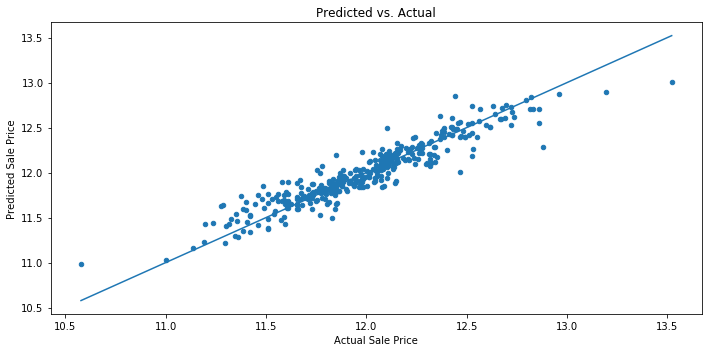

In [15]:
clf = RandomForestRegressor(n_estimators=1200, n_jobs=1, max_features='auto')

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

### train data 전체 학습

In [16]:
clf.fit(x_train, y_train_log)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### test data로 prediction

In [17]:
y_pred = clf.predict(x_test)
randfor_pred = np.exp(y_pred)
randfor_pred

array([127973.24710473, 154396.58004006, 173022.68984047, ...,
       151800.58769392, 112777.82090207, 234914.48601551])

- - -
# 5. xgboost

### 모델 정의 및 검증

28120.693979514555


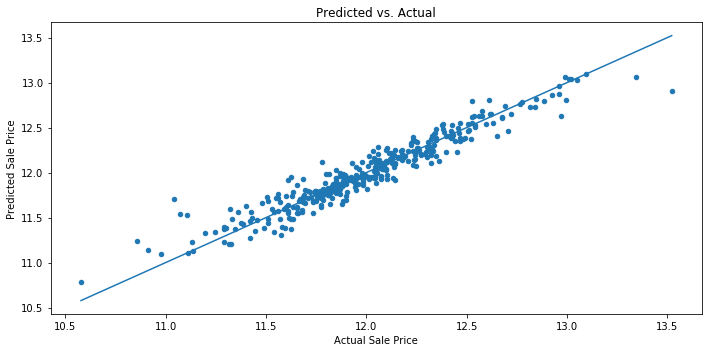

In [18]:
import xgboost as xgb

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(X_train1, y_train1)
y_pred = model_xgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

### train data 전체 학습

In [19]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=22000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(x_train, y_train_log)
y_pred = model_xgb.predict(x_test)
xgb_pred = np.exp(y_pred)
print(xgb_pred)
my_submission = pd.DataFrame({'Id': x_test.index+1461, 'SalePrice': xgb_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/xgb_all_normalize_skewed.csv', index=False)

[125793.06 168244.34 181642.12 ... 153646.45 114637.41 225250.7 ]


- - -
# 6. LightGBM

### 모델 정의 및 검증

26264.402840191375


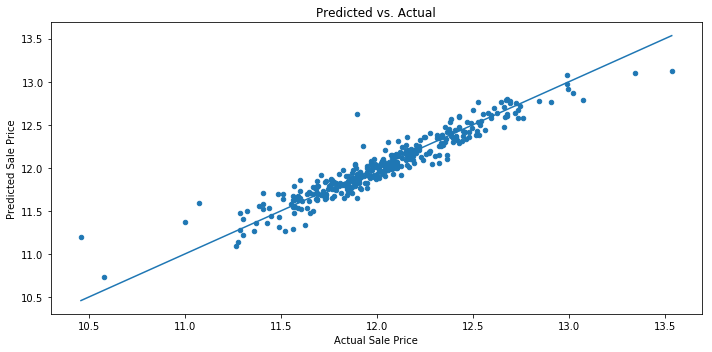

In [25]:
import lightgbm as lgb

y_train_log = y_train_log.reshape(y_train_log.shape[0])

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=5000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train1, y_train1)
y_pred = model_lgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

In [21]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=10000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train, y_train_log)
y_pred = model_lgb.predict(x_test)
lgb_pred = np.exp(y_pred)
print(lgb_pred)
my_submission = pd.DataFrame({'Id': x_test.index+1461, 'SalePrice': lgb_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/lgb_all_normalize_skewed.csv', index=False)

[125346.03857417 162512.21755254 188707.7643373  ... 156277.5305279
 112249.49751559 217876.85967634]


- - -
# ensemble 적용

In [22]:
# (?, ) -> (?, 1)
randfor_pred = randfor_pred.reshape([randfor_pred.shape[0], 1])
xgb_pred = xgb_pred.reshape([xgb_pred.shape[0], 1])
lgb_pred = lgb_pred.reshape([lgb_pred.shape[0], 1])


In [23]:
mean_pred = (xgb_pred+hidden1_pred+randfor_pred + lgb_pred)/4

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (mean_pred)
print(submission)
submission.to_csv('./output_csv/mean_pred.csv', index=False)

        Id      SalePrice
0     1461  125840.235482
1     1462  159798.090023
2     1463  181482.472919
3     1464  193372.337727
4     1465  193151.366933
5     1466  173927.039369
6     1467  172818.508629
7     1468  165458.203782
8     1469  185382.738353
9     1470  122199.170446
10    1471  189835.550200
11    1472   96533.870524
12    1473   96424.855198
13    1474  151604.614788
14    1475  125738.995029
15    1476  359483.881606
16    1477  246657.377276
17    1478  299159.036092
18    1479  277671.795147
19    1480  471413.261226
20    1481  328546.038262
21    1482  205530.731694
22    1483  172988.836760
23    1484  170148.088809
24    1485  176611.395079
25    1486  192869.473134
26    1487  337516.014109
27    1488  226332.644957
28    1489  199441.043909
29    1490  223241.523800
...    ...            ...
1429  2890   81308.991463
1430  2891  137397.764093
1431  2892   48417.185431
1432  2893   84558.104961
1433  2894   56480.277753
1434  2895  324996.601326
1435  2896  